In [1]:
library(R.matlab)
library("FactoMineR")
library("factoextra")
library(Factoshiny)
library(RColorBrewer)
library(NbClust)
options(ggrepel.max.overlaps = Inf)



Warning message:
"package 'R.matlab' was built under R version 4.0.4"
R.matlab v3.6.2 (2018-09-26) successfully loaded. See ?R.matlab for help.


Attaching package: 'R.matlab'


The following objects are masked from 'package:base':

    getOption, isOpen


Warning message:
"package 'FactoMineR' was built under R version 4.0.4"
Warning message:
"package 'factoextra' was built under R version 4.0.4"
Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: shiny

Loading required package: FactoInvestigate



# DATA 1 BERT : 

### Chargement de données :

In [2]:
data1.bert <- readMat("C:\\Users\\moham\\Downloads\\word_representations_bert_base\\word_representations_bert_base\\word_representations__bert-base-cased__Data1.mat",fileEncoding="latin1")


In [3]:
str(data1.bert)


List of 16
 $ k           : int [1, 1] 3
 $ real.class  : chr [1:583, 1] "GEO   " "GEO   " "GEO   " "GEO   " ...
 $ words       : chr [1:583, 1] "abroad         " "Achaea         " "Actium         " "Aeolia         " ...
 $ dataset.name: chr [1, 1] "UFSAC_3"
 $ layer.01    : num [1:583, 1:768] -0.6804 0.0108 0.1797 0.6474 0.7538 ...
  ..- attr(*, "Csingle")= logi TRUE
 $ layer.02    : num [1:583, 1:768] -0.1322 0.0216 -0.3859 0.4745 0.8906 ...
  ..- attr(*, "Csingle")= logi TRUE
 $ layer.03    : num [1:583, 1:768] -0.386 0.383 -0.53 0.322 0.664 ...
  ..- attr(*, "Csingle")= logi TRUE
 $ layer.04    : num [1:583, 1:768] 0.0739 0.3132 -0.3421 0.1685 0.536 ...
  ..- attr(*, "Csingle")= logi TRUE
 $ layer.05    : num [1:583, 1:768] 0.0136 0.2618 -0.1799 0.2282 0.8982 ...
  ..- attr(*, "Csingle")= logi TRUE
 $ layer.06    : num [1:583, 1:768] 0.014 0.606 -0.274 0.443 1.021 ...
  ..- attr(*, "Csingle")= logi TRUE
 $ layer.07    : num [1:583, 1:768] 0.171 0.955 -0.537 0.529 0.842 ...
  ..- at

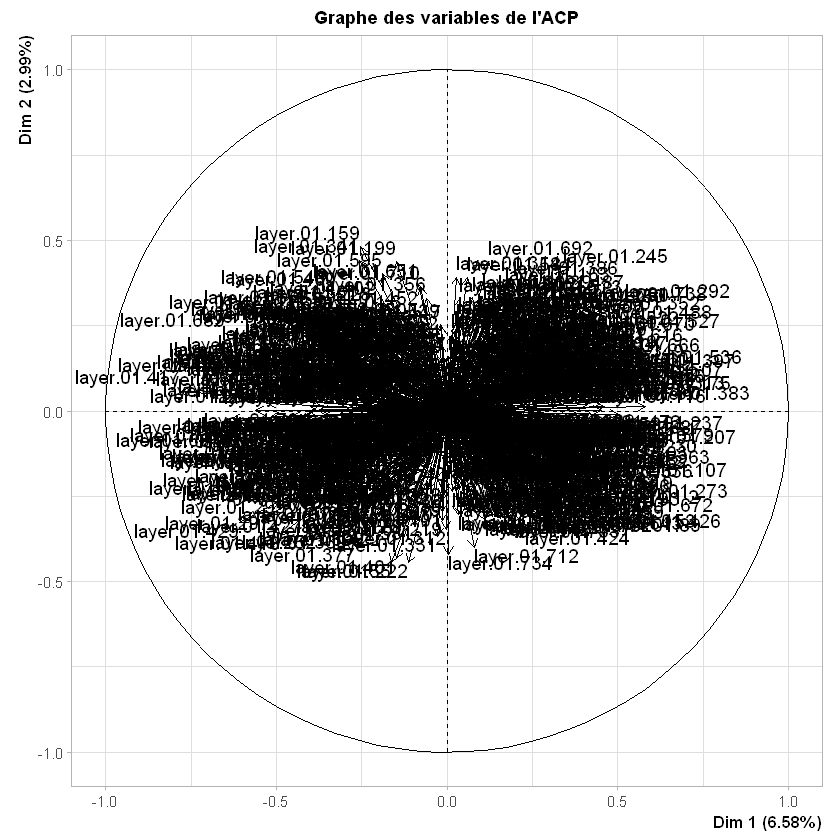

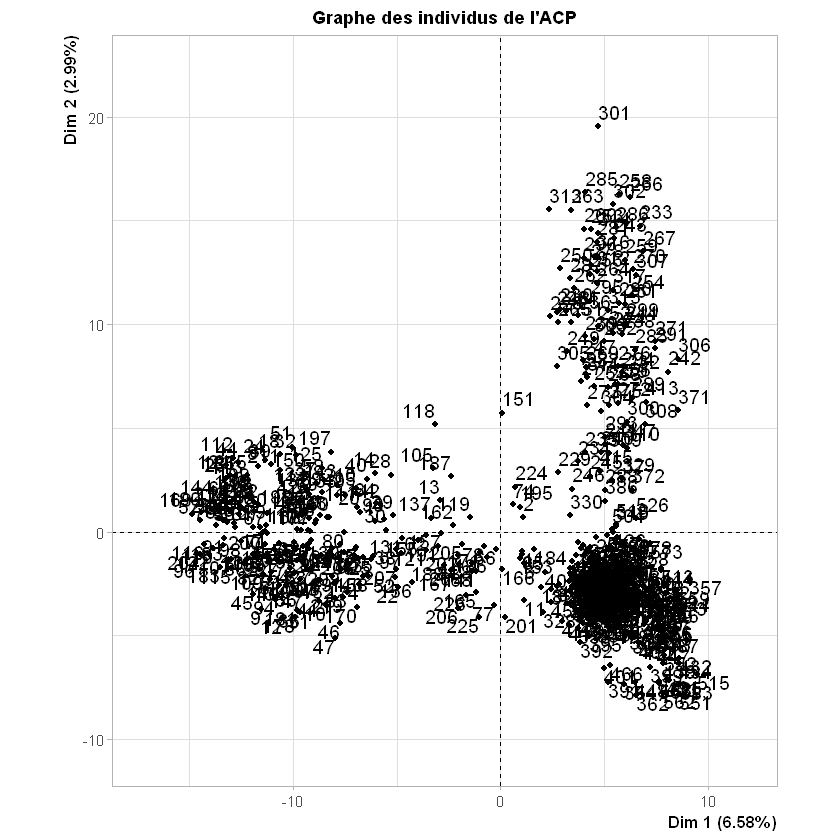

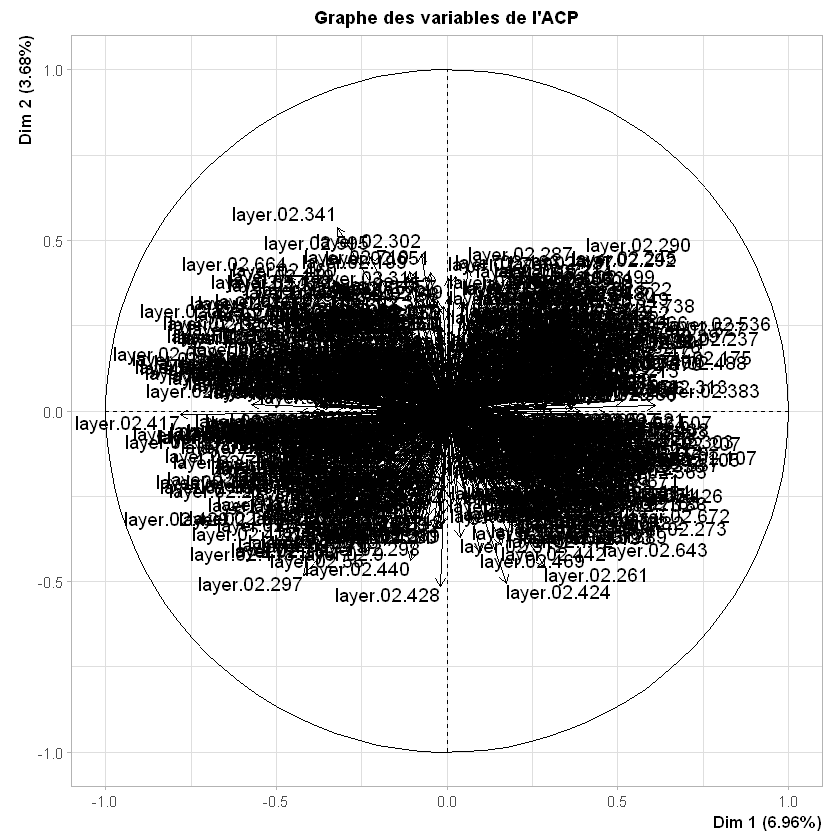

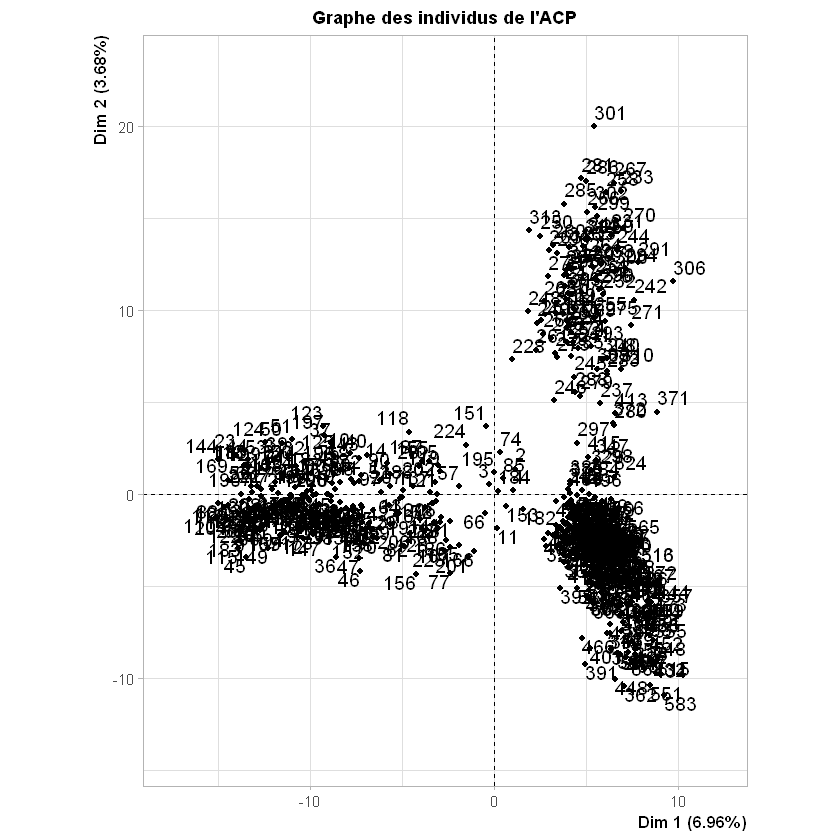

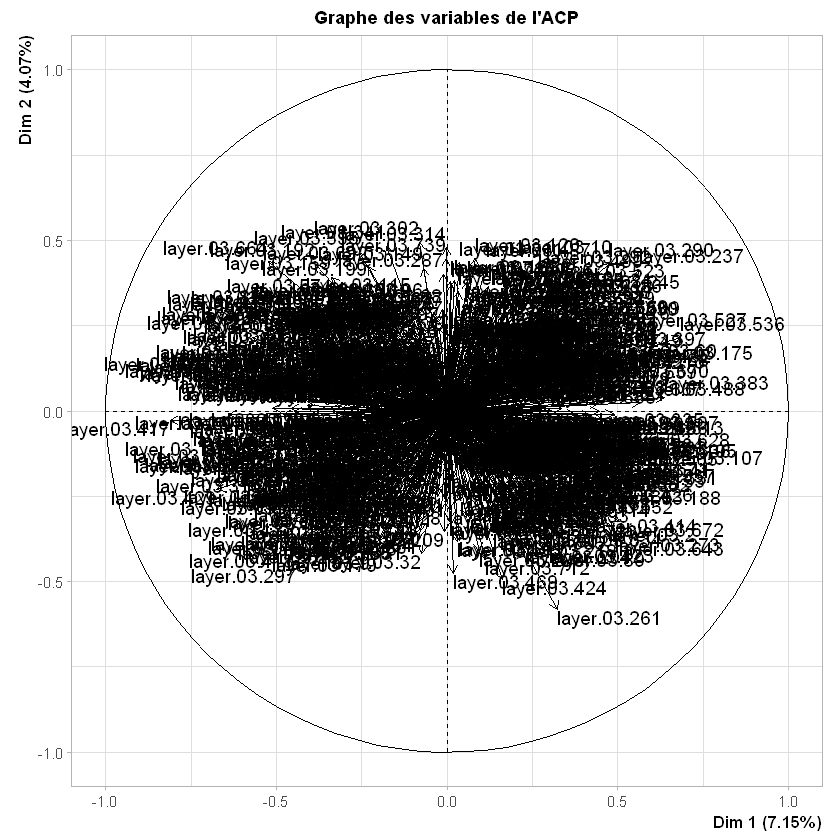

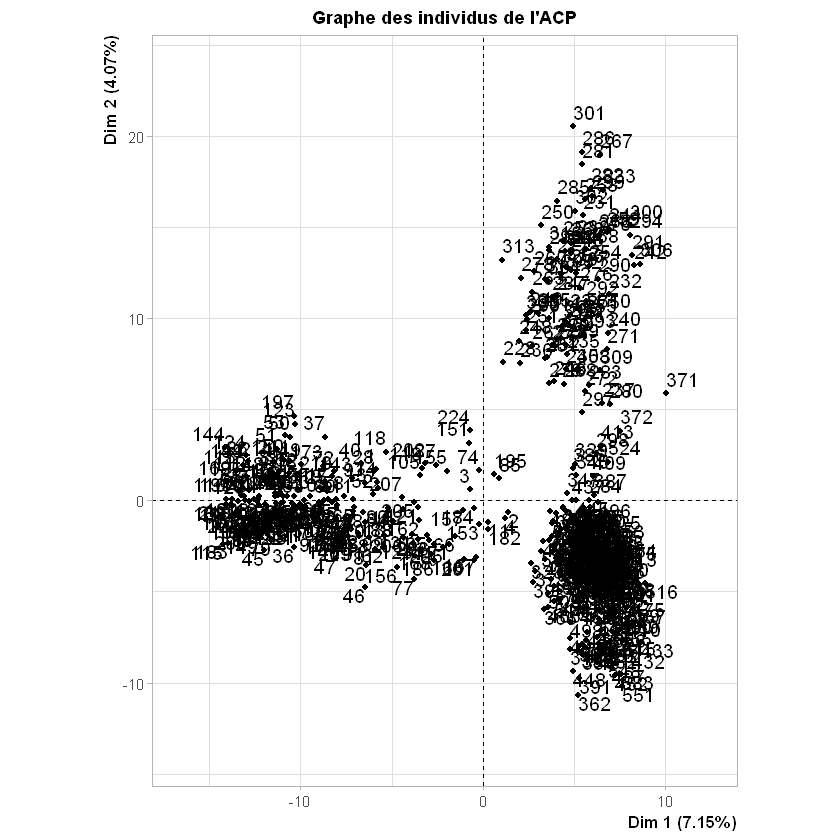

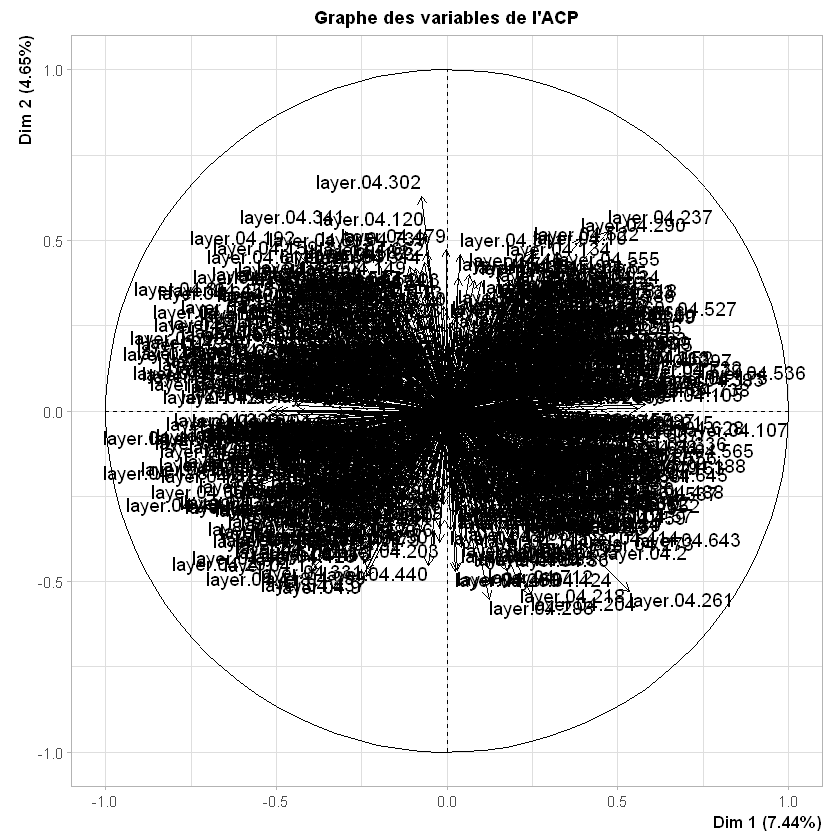

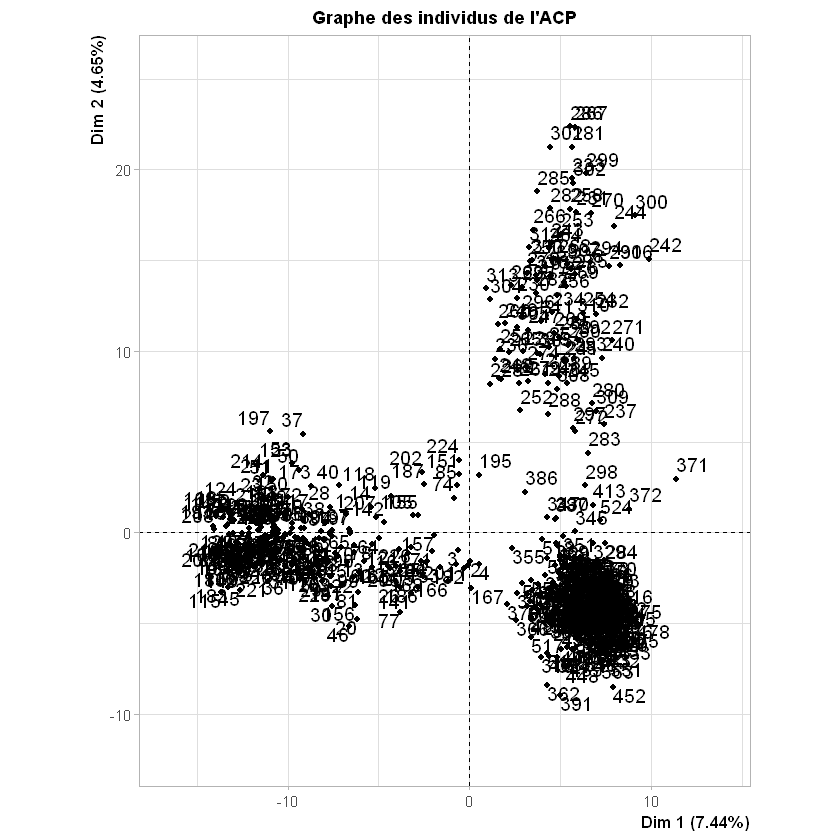

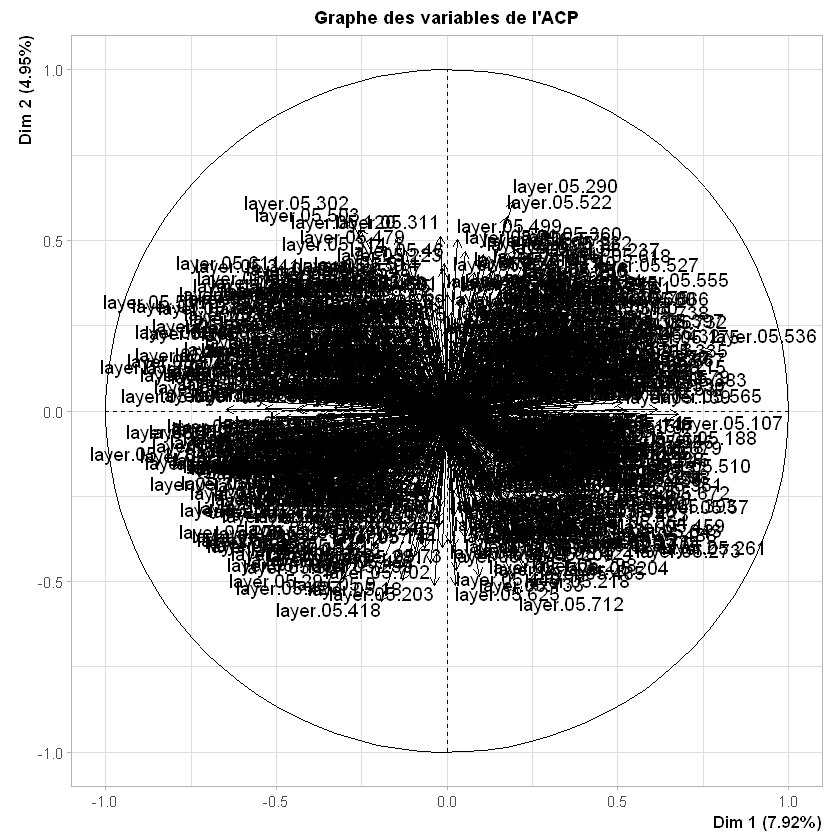

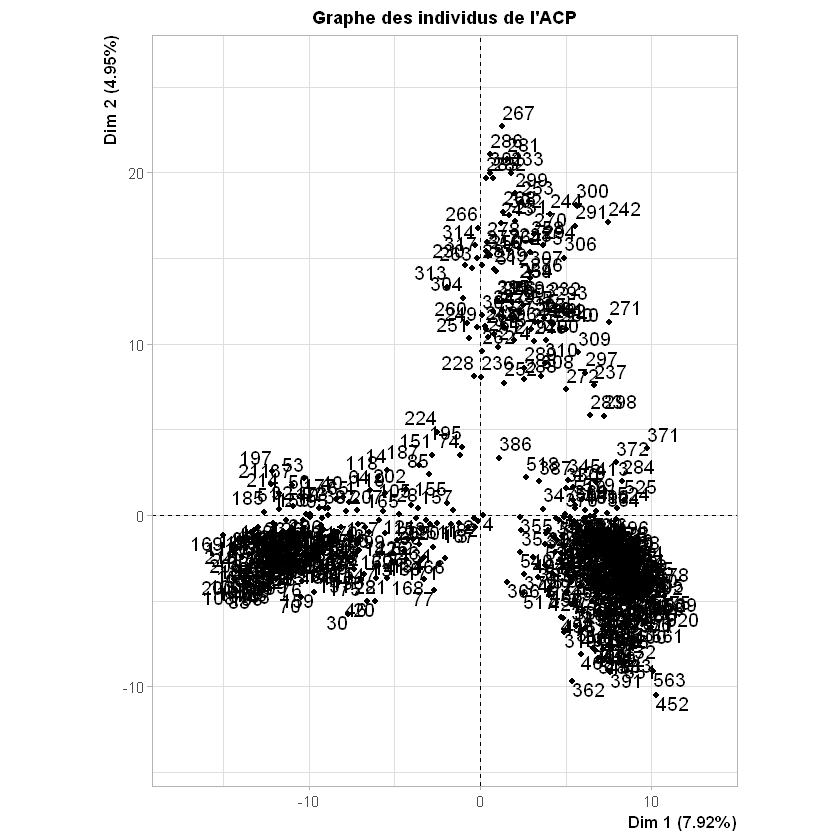

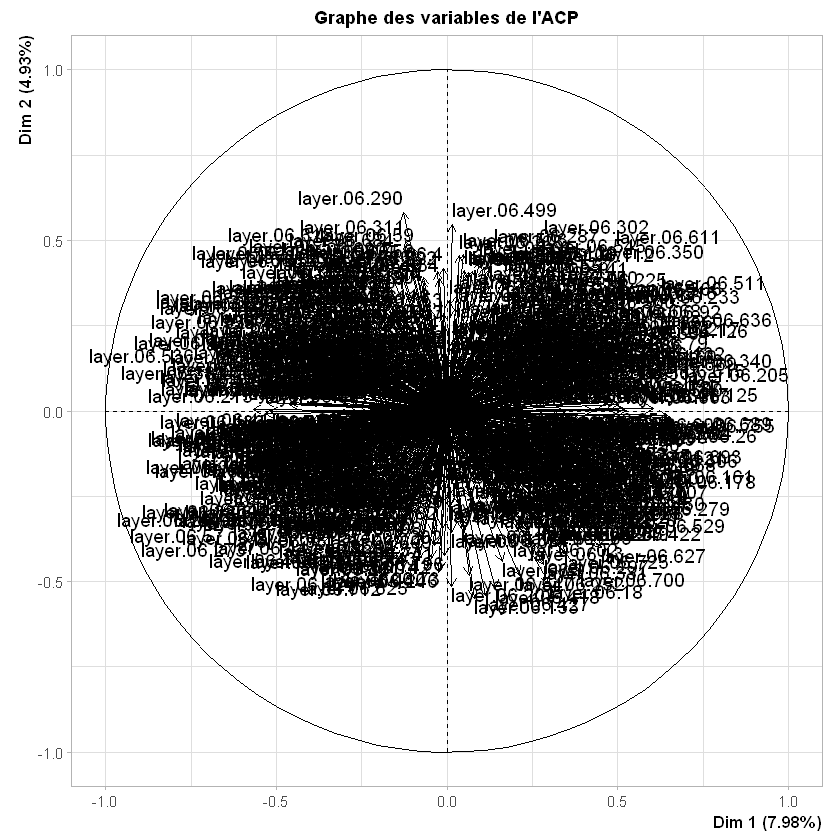

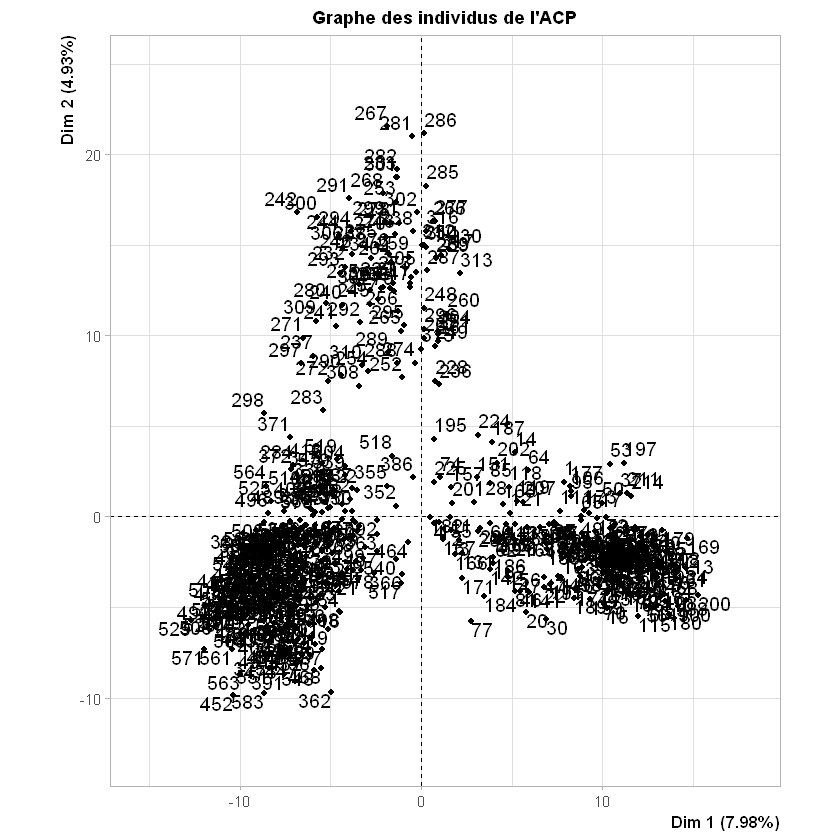

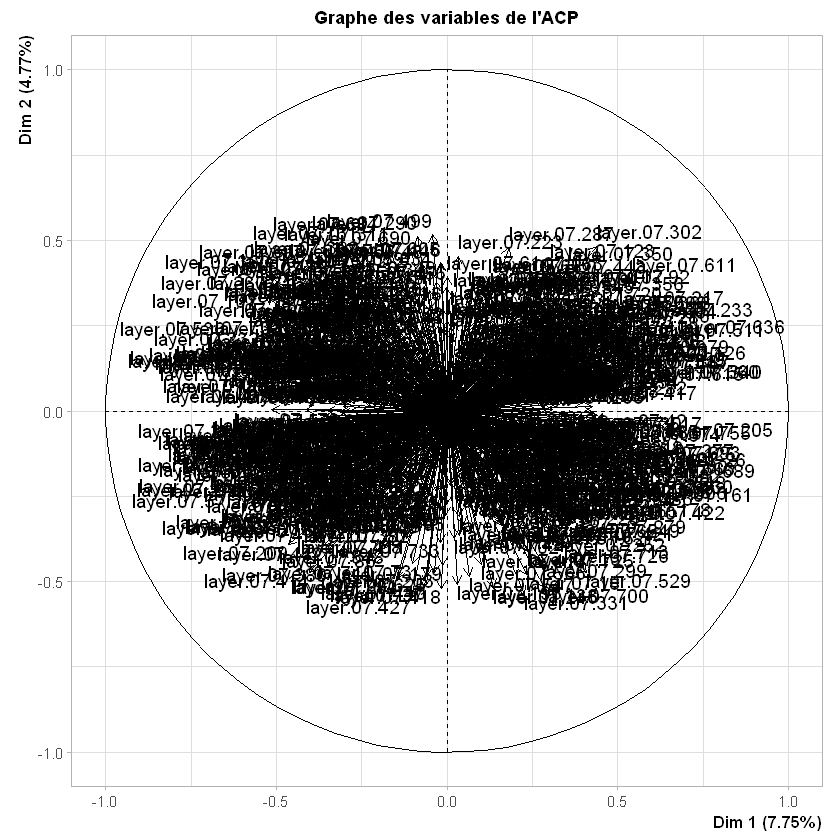

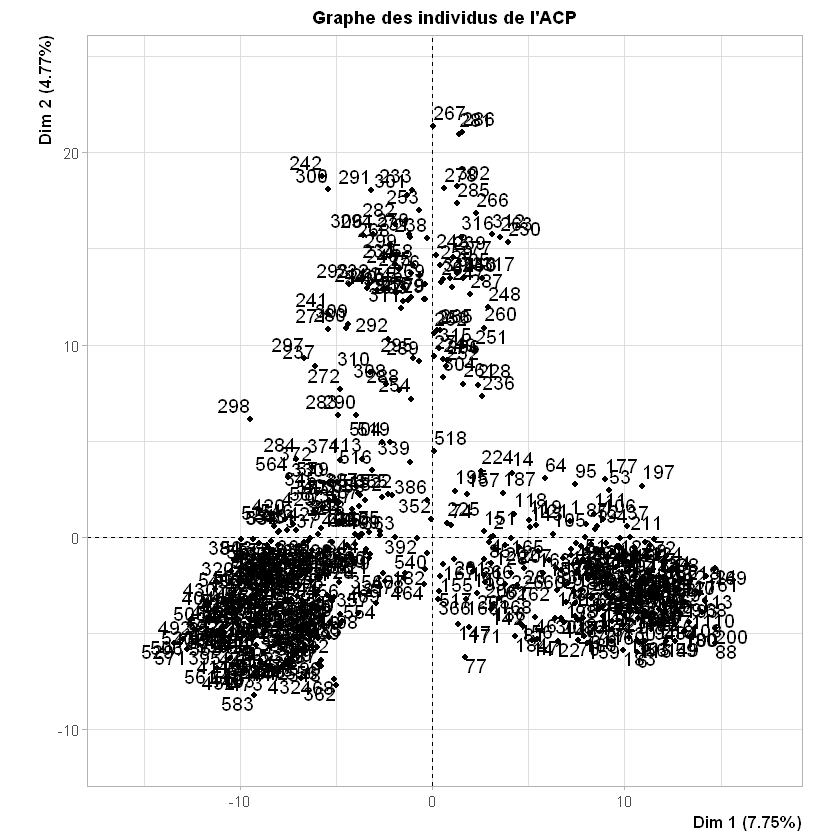

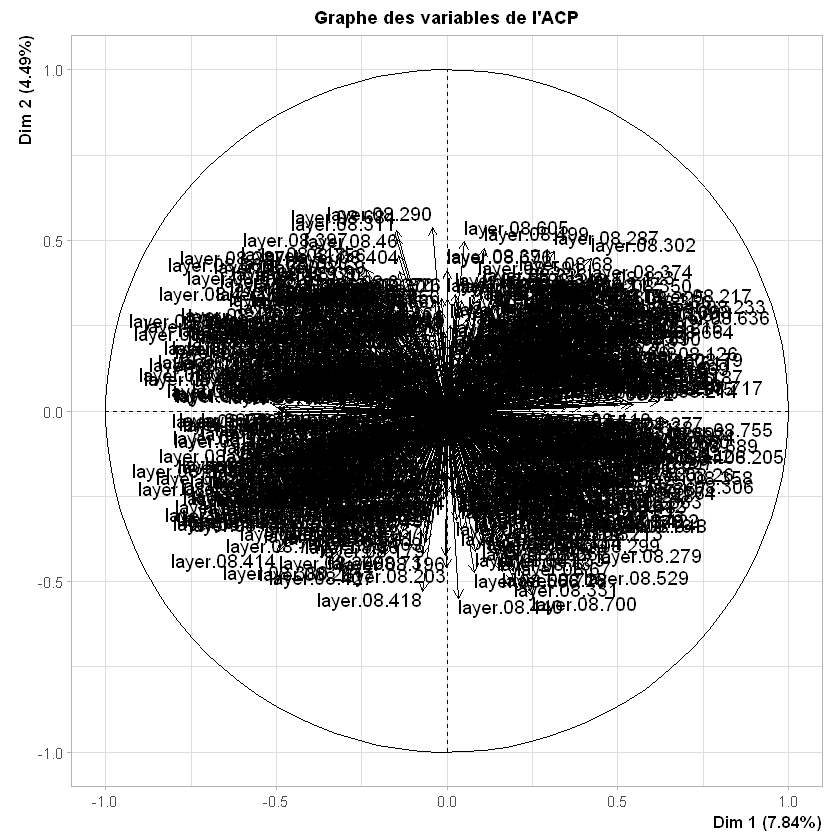

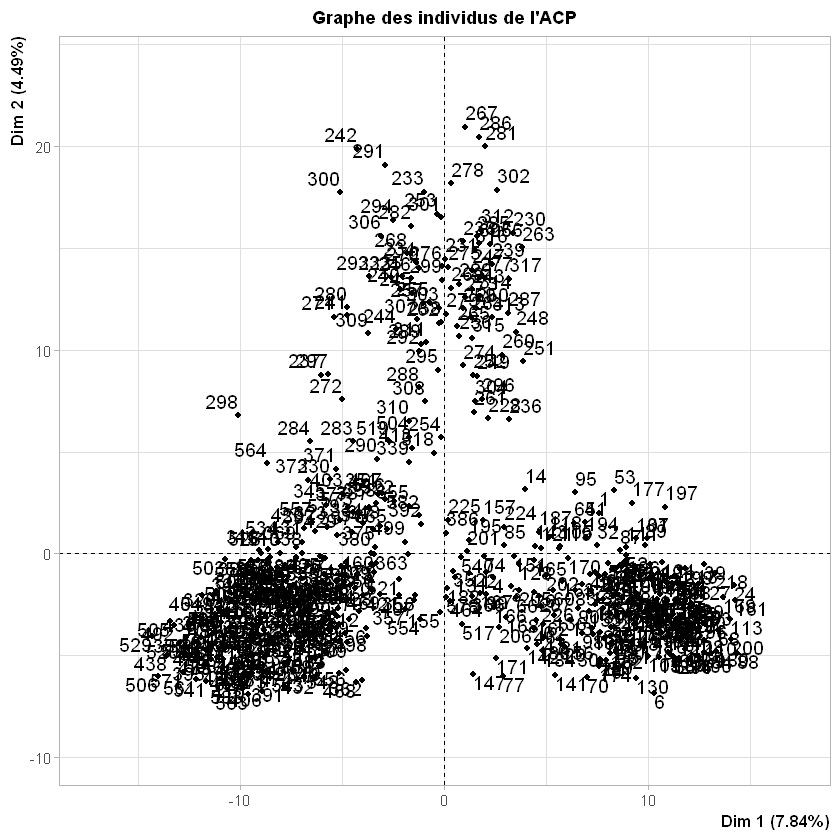

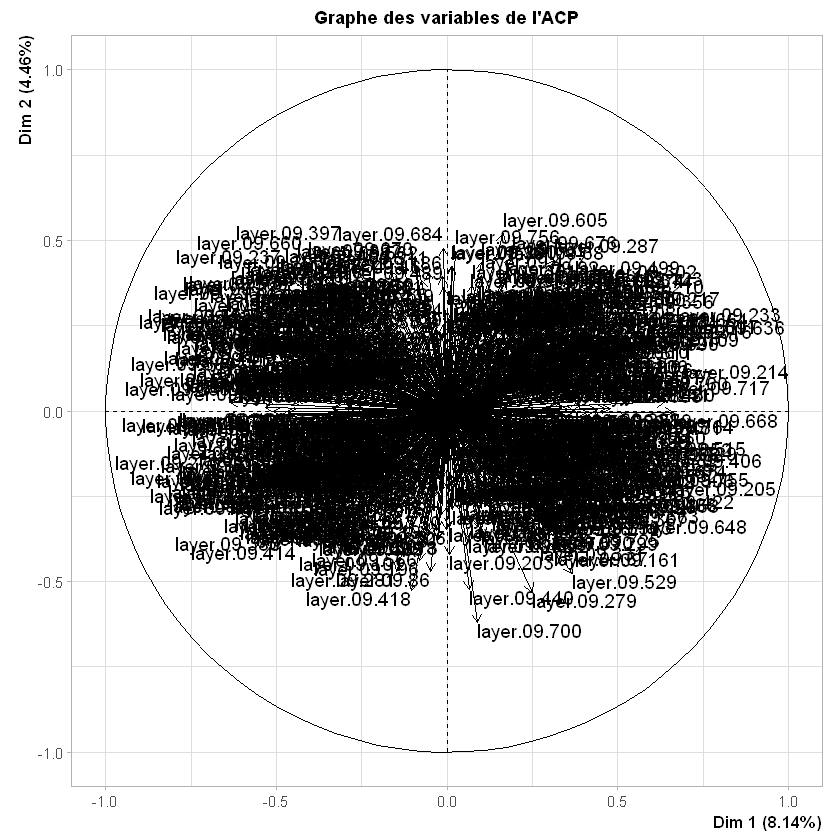

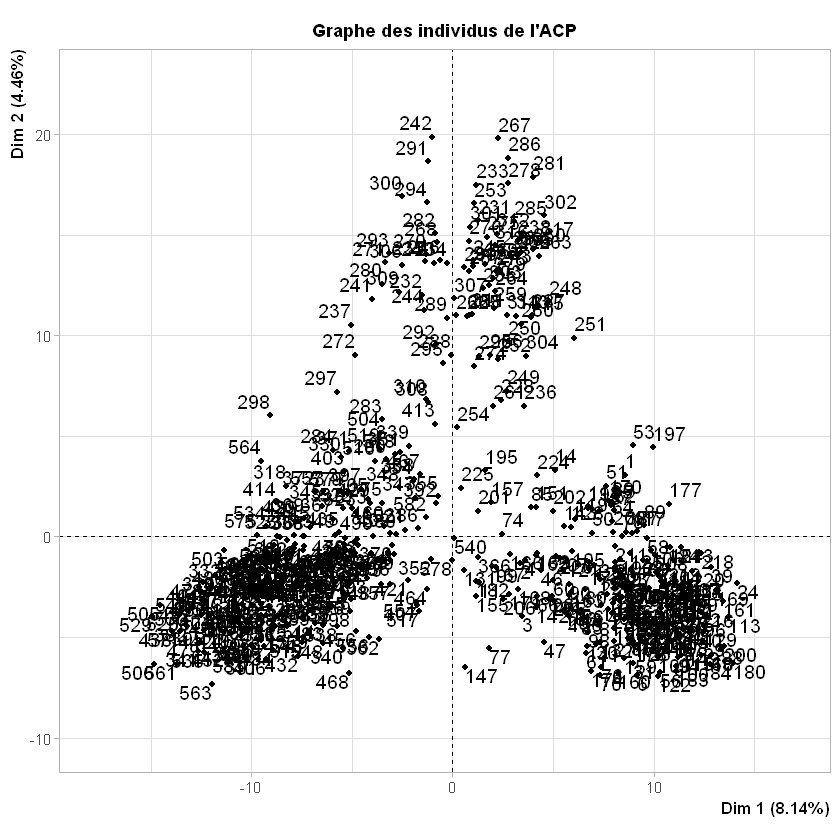

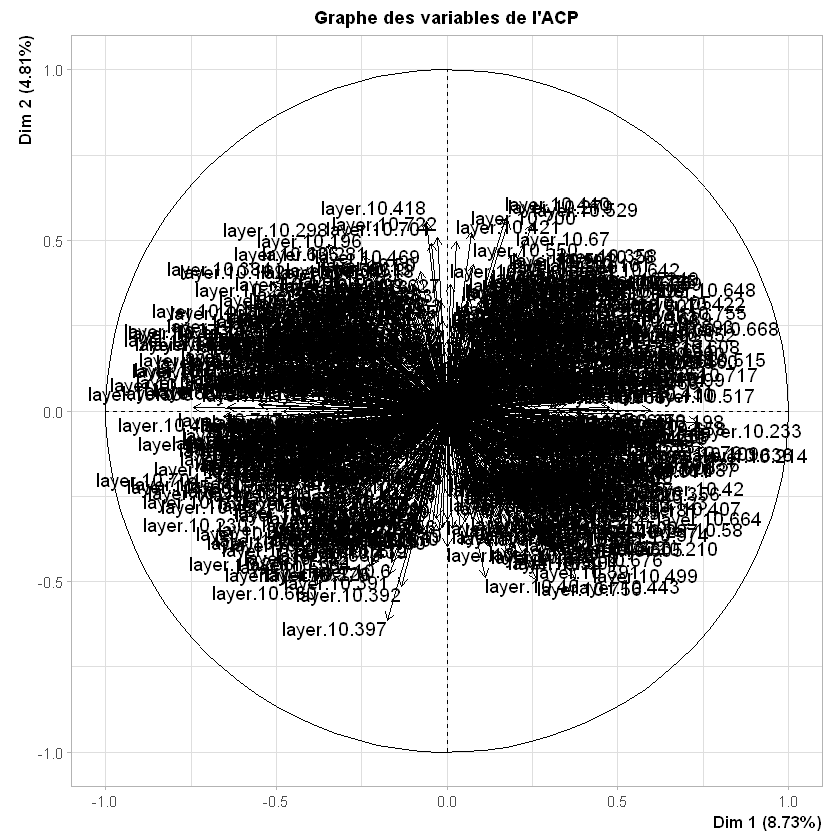

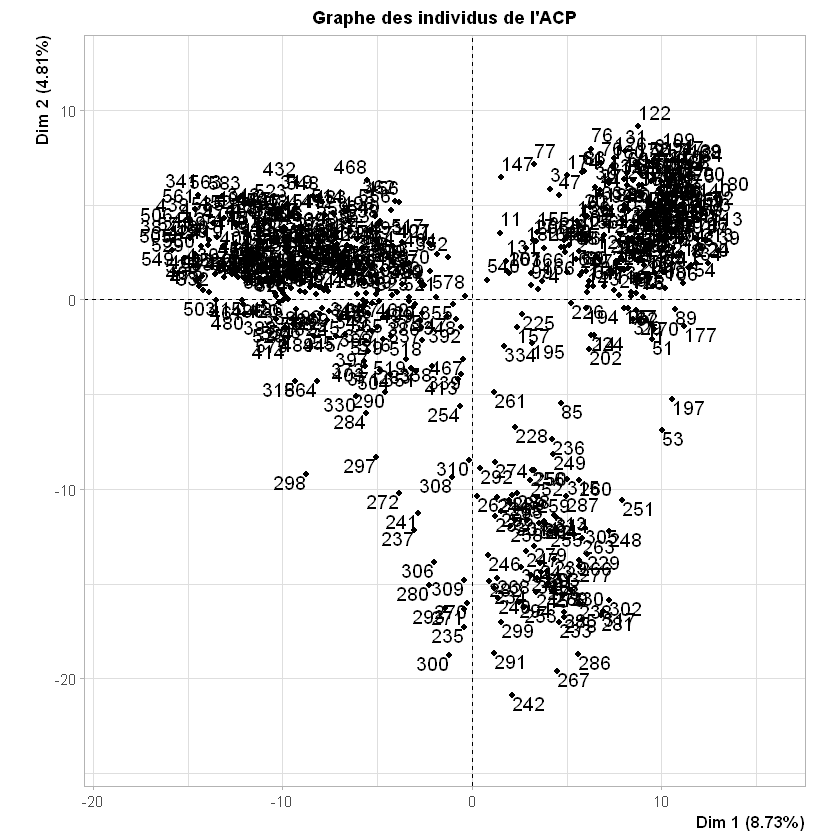

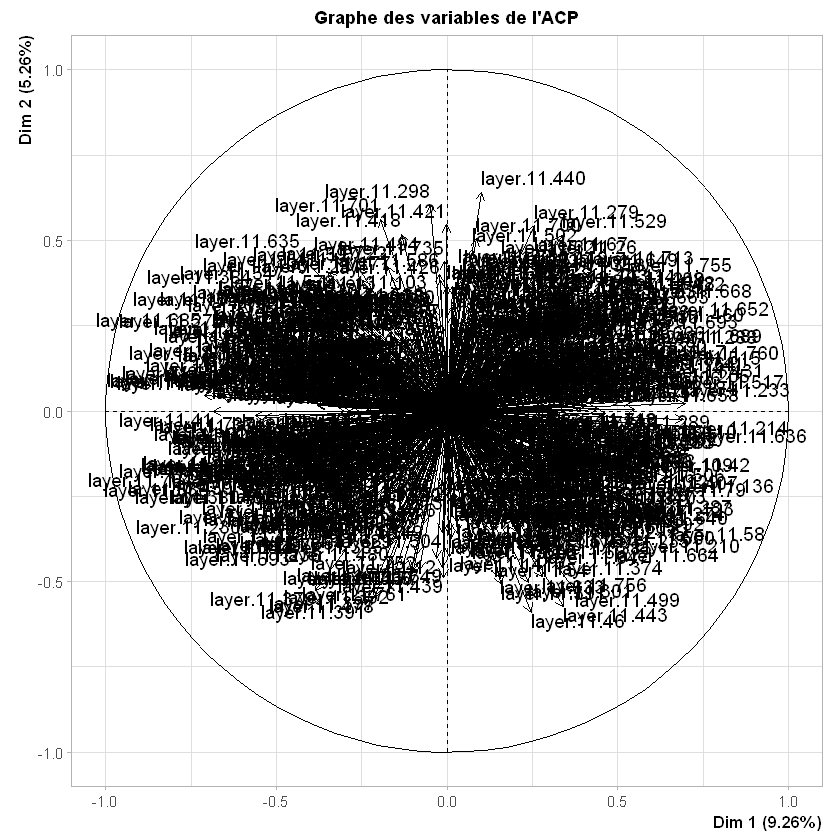

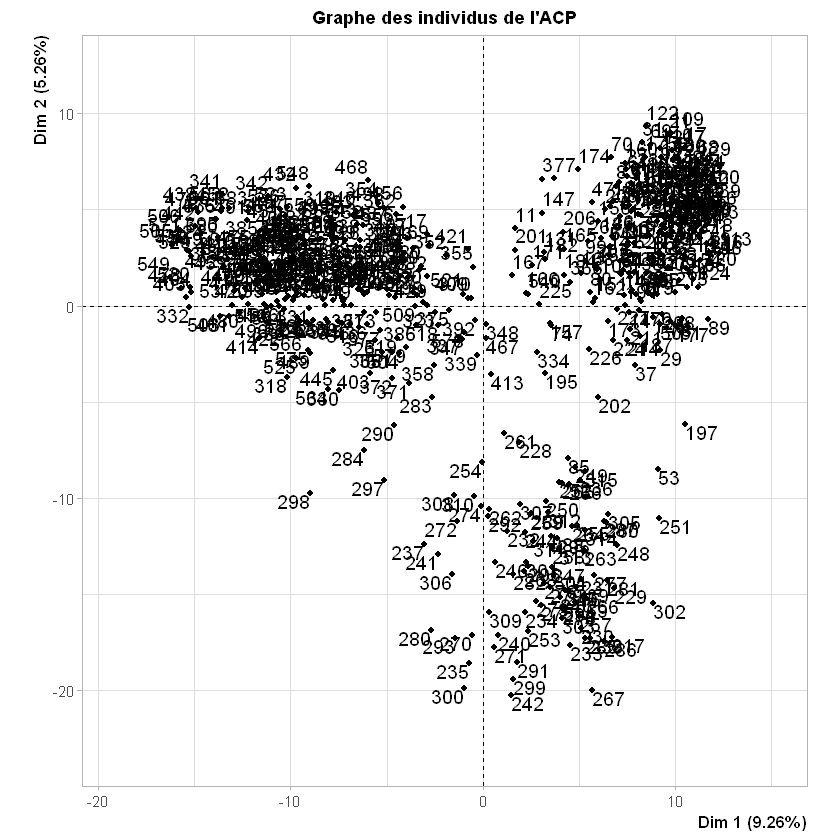

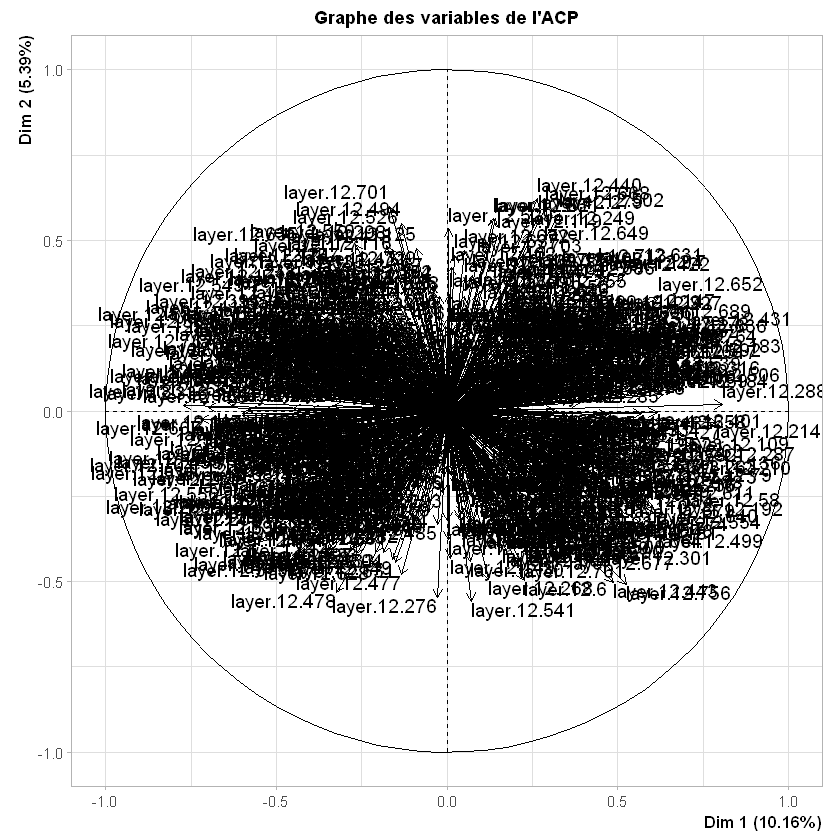

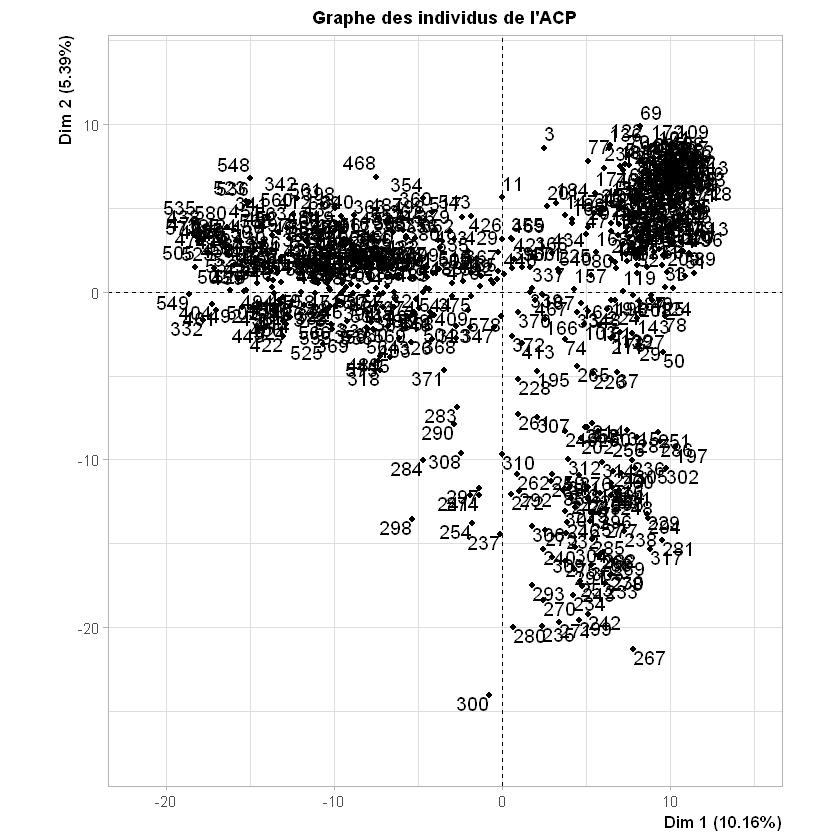

In [4]:
li = c(5,6,7,8,9,10,11,12,13,14,15,16)
for(i in li){
    res1bert.PCA<-PCA(data1.bert[i],graph=FALSE)
    print(plot.PCA(res1bert.PCA,choix='var',title="Graphe des variables de l'ACP"))
    print(plot.PCA(res1bert.PCA,title="Graphe des individus de l'ACP"))
}

In [4]:
li = c(5,6,7,8,9,10,11,12,13,14,15,16)
df1.bert = as.data.frame(data1.bert[li])
res1bert.MFA = MFA(df1.bert, group=c(768,768,768,768,768,768,768,768,768,768,768,768), type=c("s","s","s","s","s","s","s","s","s","s","s","s"), ncp=5, name.group=c("layer1","layer2","layer3","layer4","layer5","layer6","layer7","layer8","layer9","layer10","layer11","layer12"))

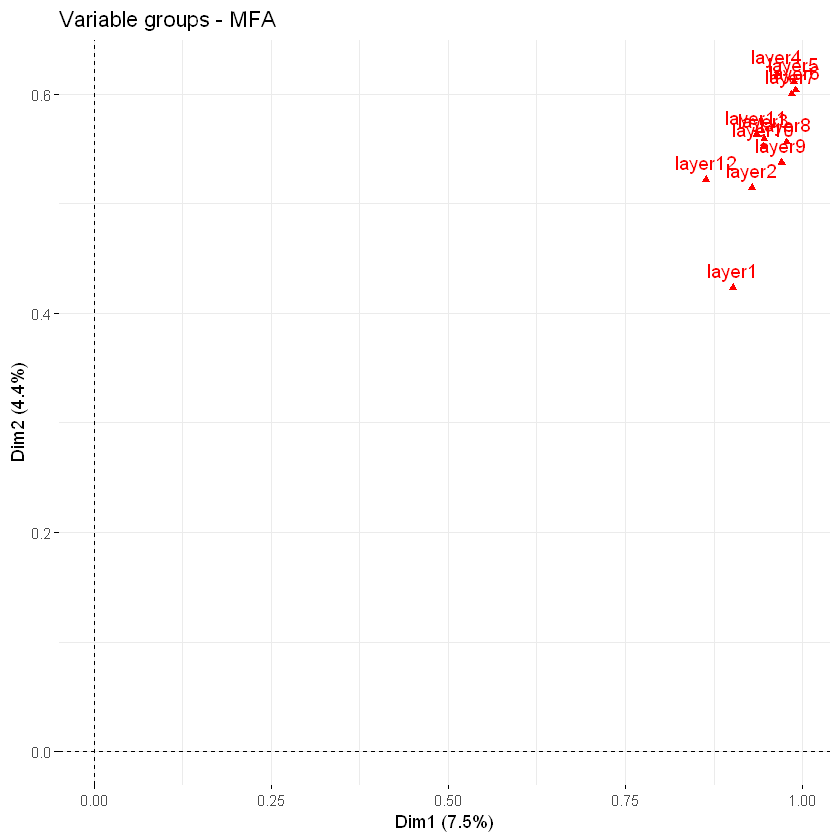

In [6]:
#affichage des groupes
fviz_mfa_var(res1bert.MFA, "group")

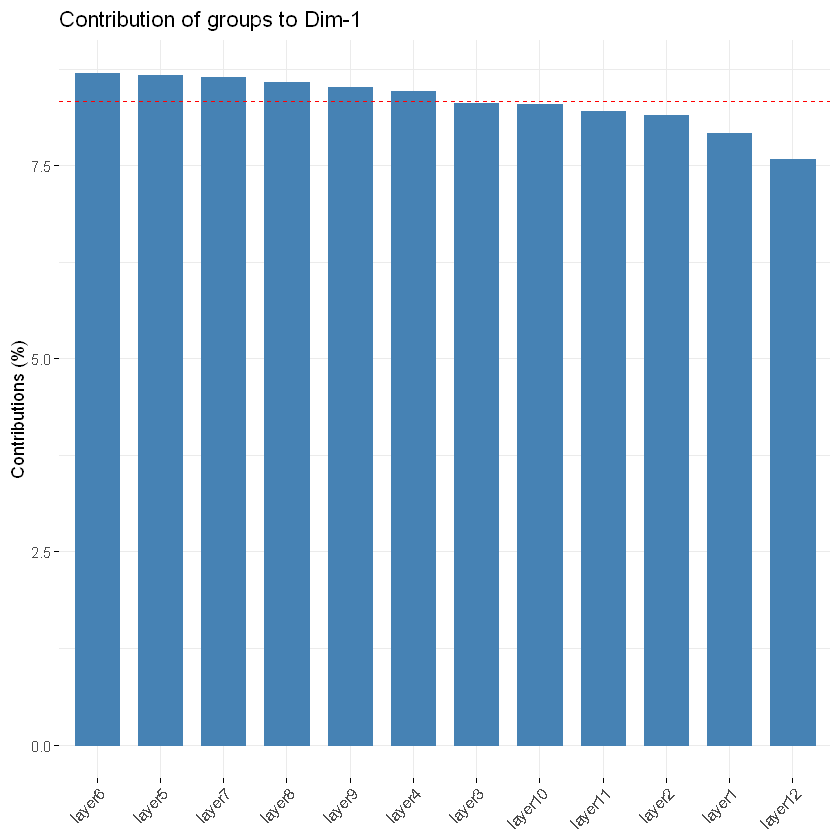

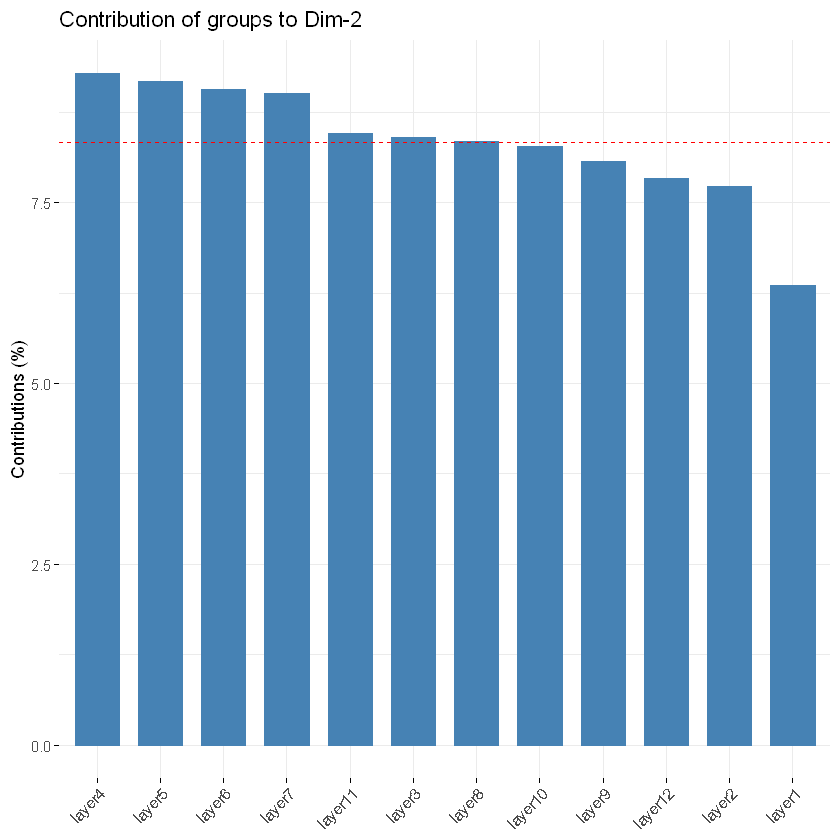

In [7]:
# Contribution à la première dimension
fviz_contrib (res1bert.MFA, "group", axes = 1)
# Contribution à la deuxième dimension
fviz_contrib (res1bert.MFA, "group", axes = 2)

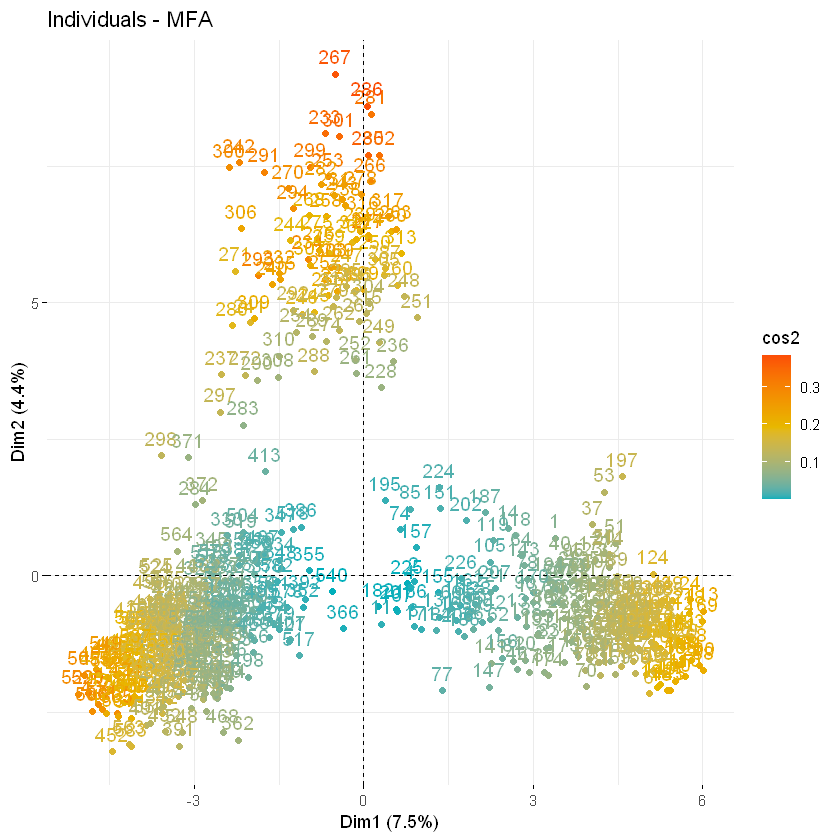

In [8]:
#graphe des individus
fviz_mfa_ind(res1bert.MFA, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = FALSE)

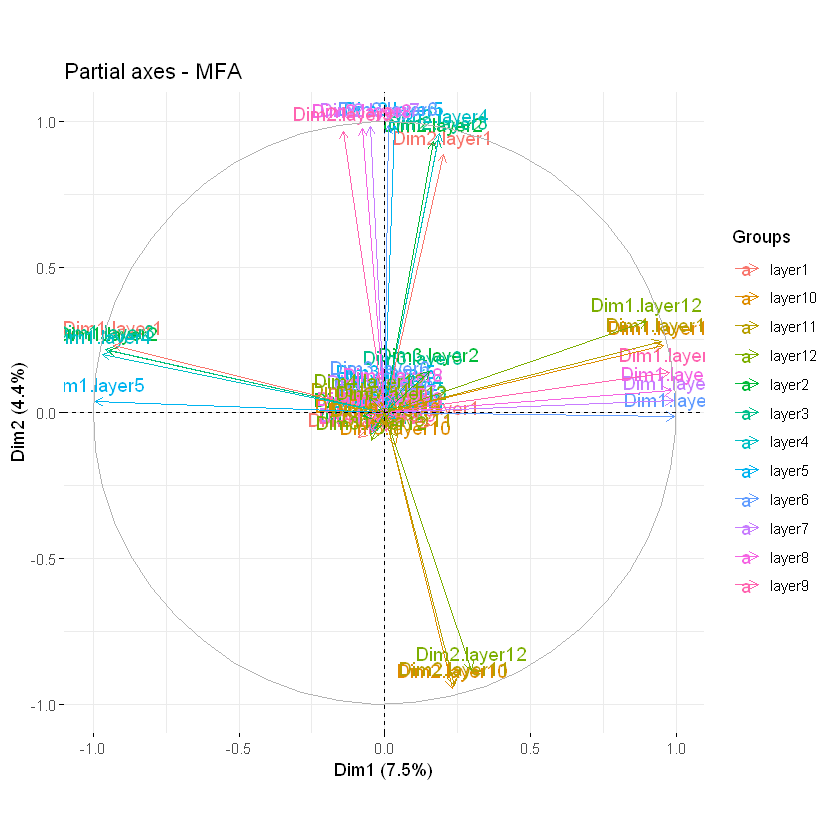

In [9]:
mycolors <- colorRampPalette(brewer.pal(8, "Set2"))(12)
fviz_mfa_axes (res1bert.MFA)

In [5]:
# maintenant on va garder que les 20 premières composantes principales
res1bert.MFA = MFA(df1.bert, group=c(768,768,768,768,768,768,768,768,768,768,768,768), type=c("s","s","s","s","s","s","s","s","s","s","s","s"), ncp=20, name.group=c("layer1","layer2","layer3","layer4","layer5","layer6","layer7","layer8","layer9","layer10","layer11","layer12"))
str(res1bert.MFA)

List of 11
 $ separate.analyses:List of 12
  ..$ layer1 :List of 5
  .. ..$ eig : num [1:582, 1:3] 50.5 23 21 14.6 13.9 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:582] "comp 1" "comp 2" "comp 3" "comp 4" ...
  .. .. .. ..$ : chr [1:3] "eigenvalue" "percentage of variance" "cumulative percentage of variance"
  .. ..$ var :List of 4
  .. .. ..$ coord  : num [1:768, 1:20] -0.384 0.496 -0.131 0.139 0.135 ...
  .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. ..$ : chr [1:768] "layer.01.1" "layer.01.2" "layer.01.3" "layer.01.4" ...
  .. .. .. .. ..$ : chr [1:20] "Dim.1" "Dim.2" "Dim.3" "Dim.4" ...
  .. .. ..$ cor    : num [1:768, 1:20] -0.384 0.496 -0.131 0.139 0.135 ...
  .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. ..$ : chr [1:768] "layer.01.1" "layer.01.2" "layer.01.3" "layer.01.4" ...
  .. .. .. .. ..$ : chr [1:20] "Dim.1" "Dim.2" "Dim.3" "Dim.4" ...
  .. .. ..$ cos2   : num [1:768, 1:20] 0.1472 0.2458 0.0172 0.0193 0.0183 ...
  .. .. .. .

In [6]:
#récupiration du resultat du MFA :
df1bert_20<- data.frame(res1bert.MFA$separate.analyses$layer1$ind$coord,
                      res1bert.MFA$separate.analyses$layer2$ind$coord,
                      res1bert.MFA$separate.analyses$layer3$ind$coord,
                      res1bert.MFA$separate.analyses$layer4$ind$coord,
                      res1bert.MFA$separate.analyses$layer5$ind$coord,
                      res1bert.MFA$separate.analyses$layer6$ind$coord,
                      res1bert.MFA$separate.analyses$layer7$ind$coord,
                      res1bert.MFA$separate.analyses$layer8$ind$coord,
                      res1bert.MFA$separate.analyses$layer9$ind$coord,
                      res1bert.MFA$separate.analyses$layer10$ind$coord,
                      res1bert.MFA$separate.analyses$layer11$ind$coord,
                      res1bert.MFA$separate.analyses$layer12$ind$coord)

In [12]:
#utilisation de NB clust pour deviner le nb de cluster qu'on va donner au k-means
res<-NbClust(df1bert_20, distance = "euclidean", min.nc=2, max.nc=6, method = "kmeans", index = "kl")
k = as.numeric(res$Best.nc[1])

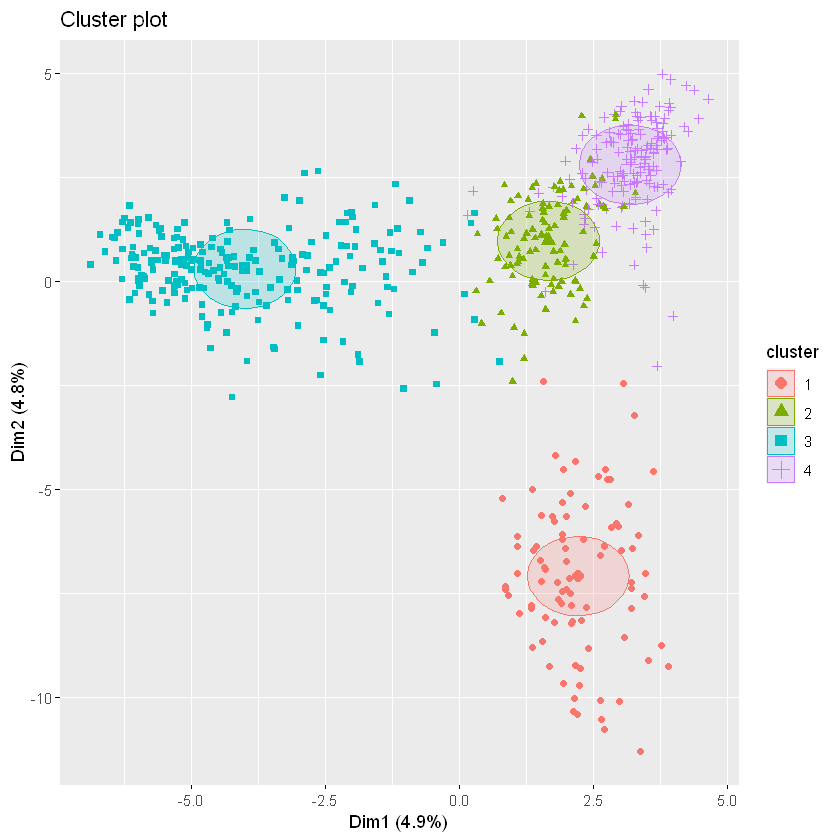

In [13]:
#k-means
res1bert.km = kmeans(df1bert_20, k, nstart = 25)
fviz_cluster(res1bert.km, data = df1bert_20, geom = c("point"),ellipse.type = "euclid")

Warning message in get_col(col, k):
"Length of color vector was longer than the number of clusters - first k elements are used"


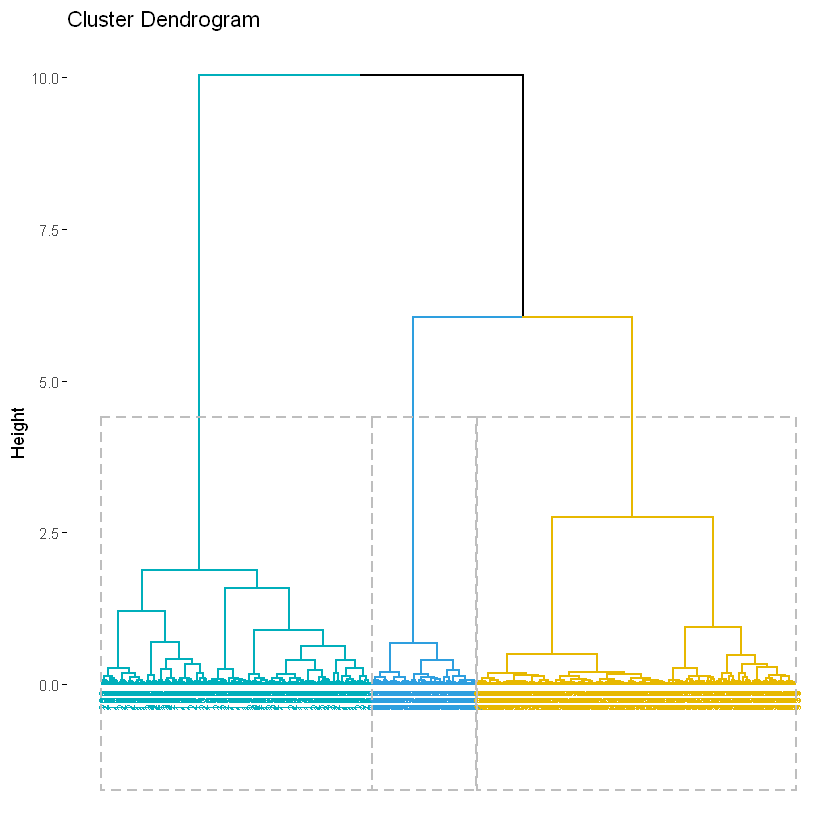

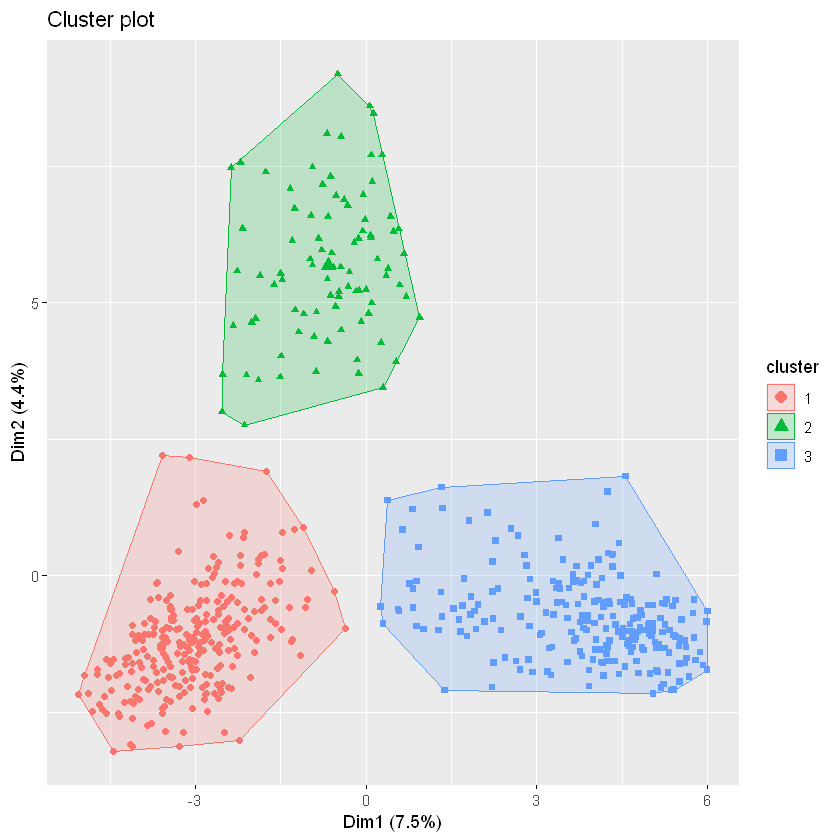

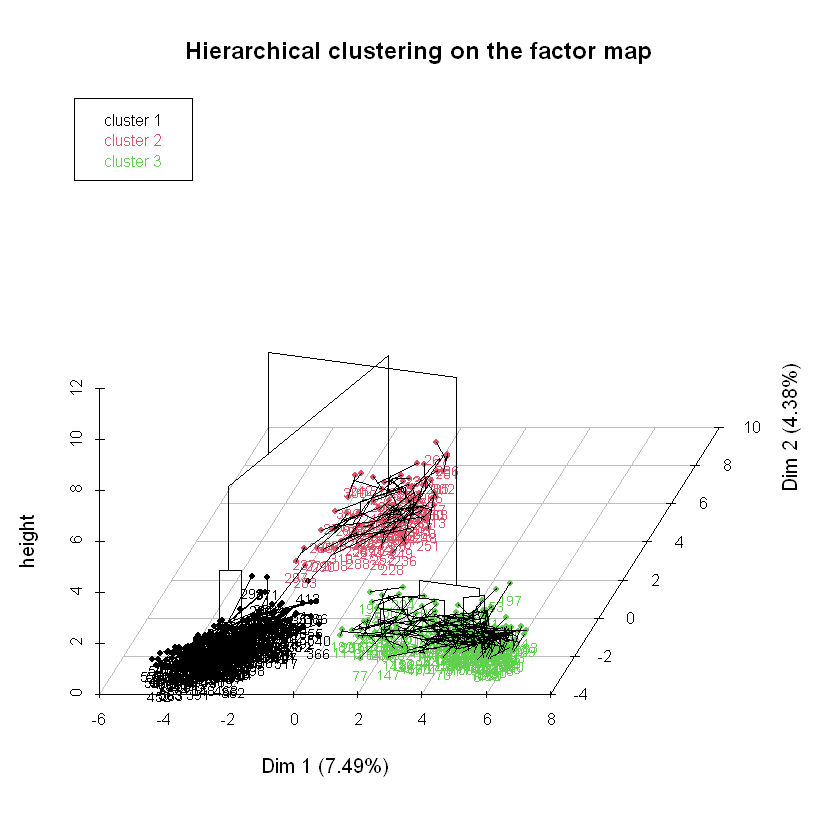

In [14]:
#cah (hcpc) ward
res1bert.hcpc.ward = HCPC (res1bert.MFA, nb.clust = 0,method="ward", graph = FALSE)
fviz_dend(res1bert.hcpc.ward, rect = TRUE, cex = 0.5,k_colors = c("#00AFBB","#2E9FDF", "#E7B800", "#FC4E07"))
fviz_cluster(res1bert.hcpc.ward, data = df1bert_20, geom = c("point"))
plot(res1bert.hcpc.ward, choice="3D.map", angle=60)


Warning message in get_col(col, k):
"Length of color vector was longer than the number of clusters - first k elements are used"


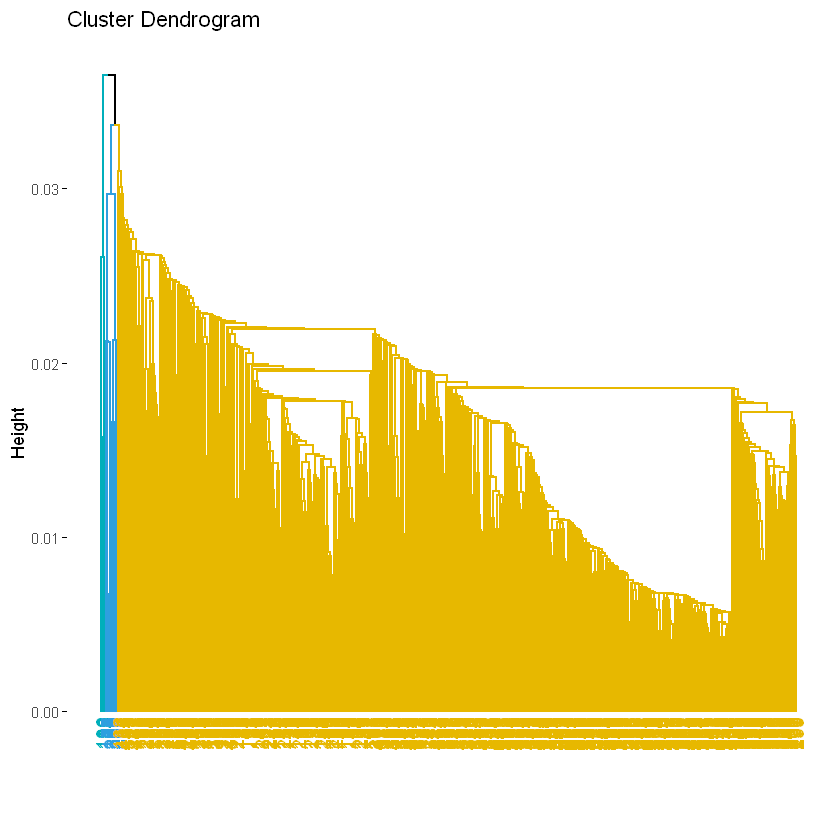

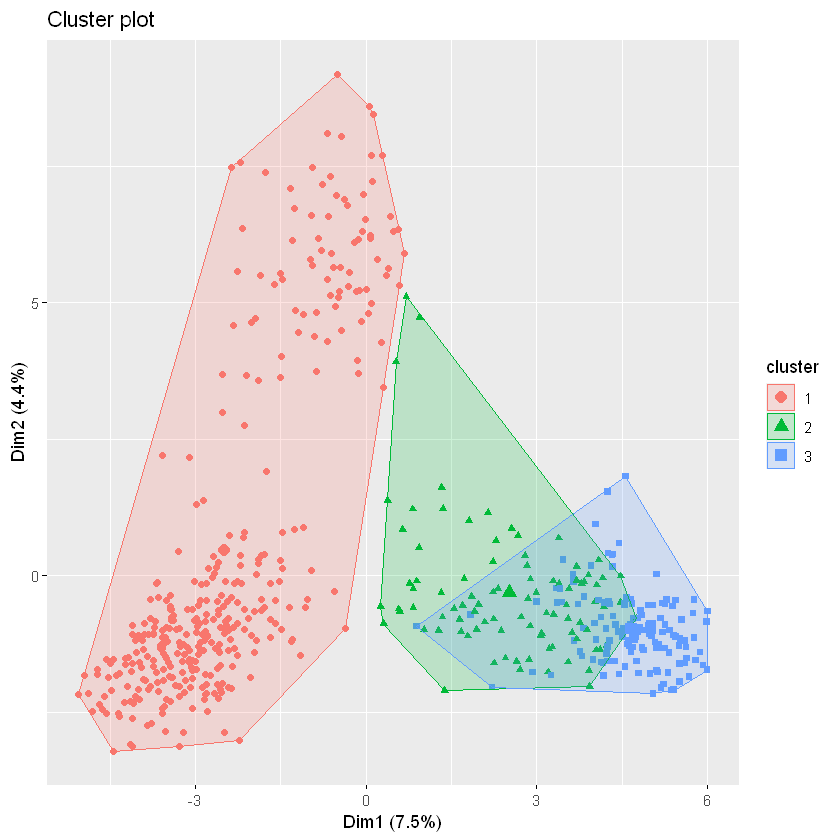

In [49]:
#cah (hcpc) single - minimum
res1bert.hcpc.single = HCPC (res1bert.MFA, nb.clust = 0,method="single", graph = FALSE)
fviz_dend(res1bert.hcpc.single,k_colors = c("#00AFBB","#2E9FDF", "#E7B800", "#FC4E07"))
fviz_cluster(res1bert.hcpc.single, data = df1bert_20, geom = c("point"))


Warning message in get_col(col, k):
"Length of color vector was longer than the number of clusters - first k elements are used"


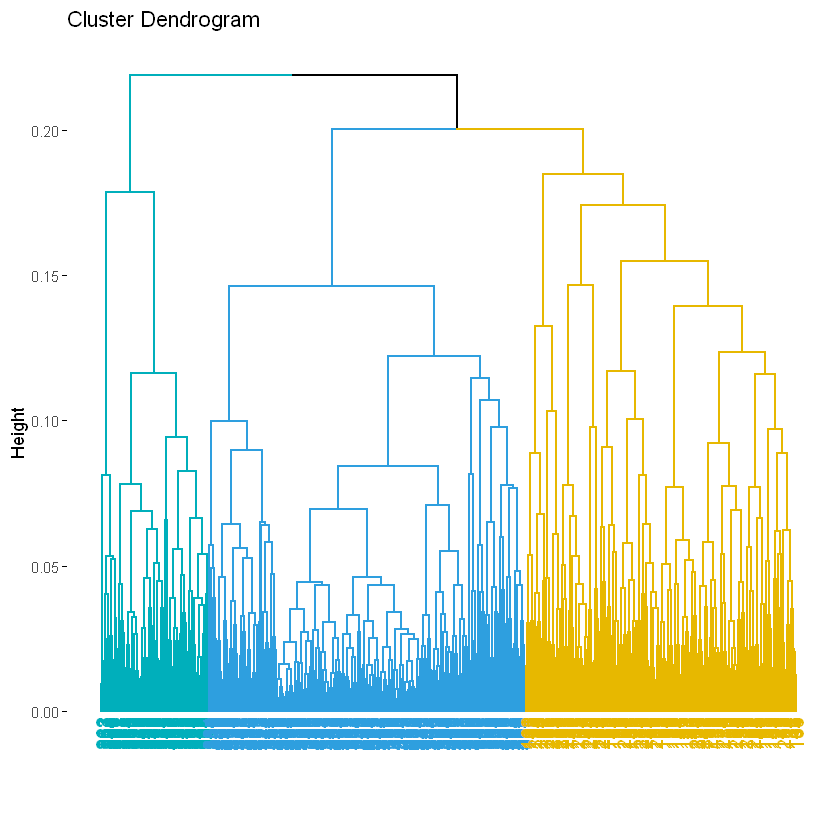

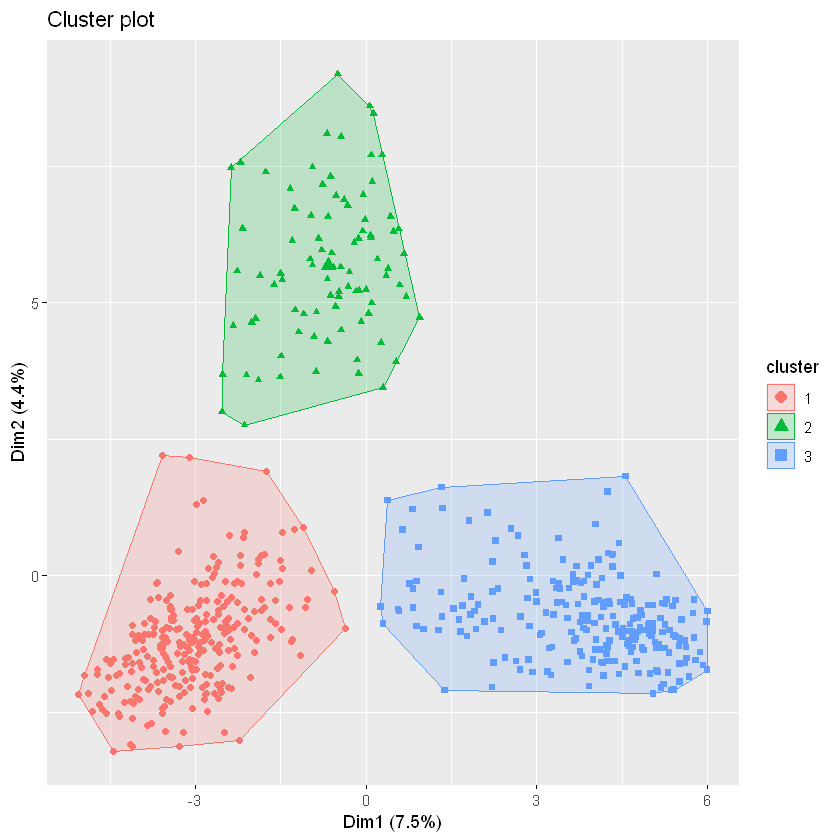

In [45]:
#cah (hcpc) complete - max
res1bert.hcpc.complete = HCPC (res1bert.MFA, nb.clust = 0,method="complete", graph = FALSE)
fviz_dend(res1bert.hcpc.complete,k_colors = c("#00AFBB","#2E9FDF", "#E7B800", "#FC4E07"))
fviz_cluster(res1bert.hcpc.complete, data = df1bert_20, geom = c("point"))

Warning message in get_col(col, k):
"Length of color vector was longer than the number of clusters - first k elements are used"


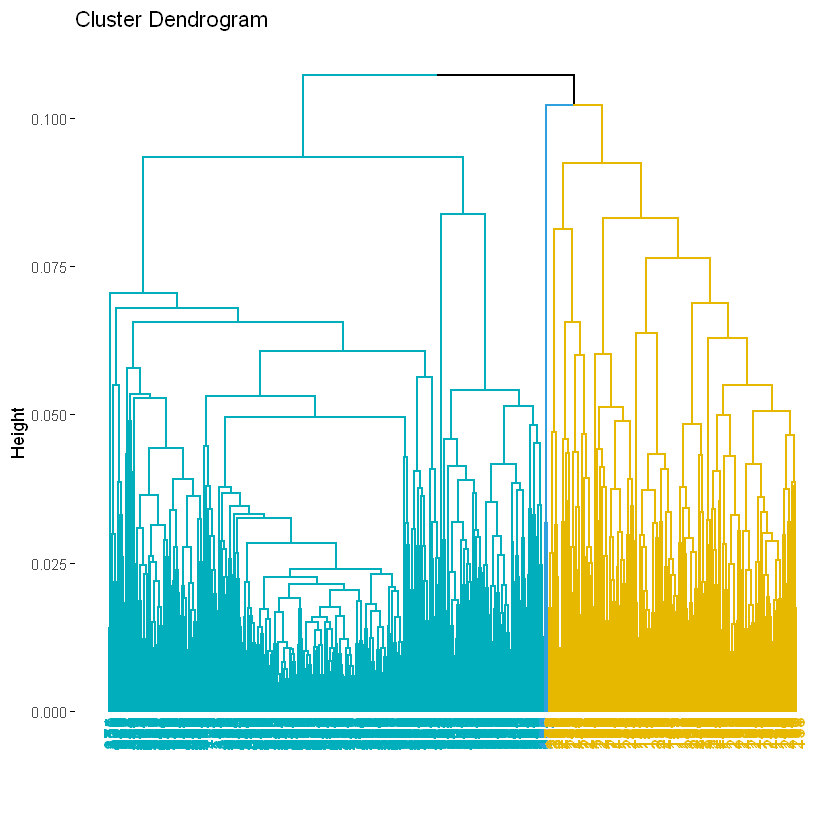

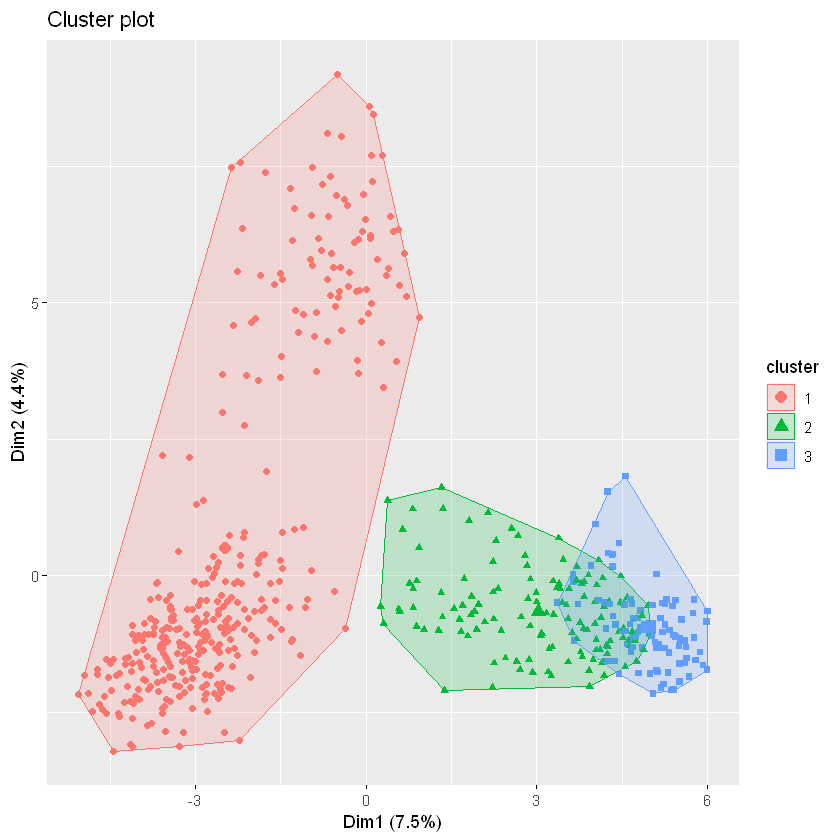

In [46]:
#cah (hcpc) average
res1bert.hcpc.average = HCPC (res1bert.MFA, nb.clust = 0,method="average", graph = FALSE)
fviz_dend(res1bert.hcpc.average,k_colors = c("#00AFBB","#2E9FDF", "#E7B800", "#FC4E07"))
fviz_cluster(res1bert.hcpc.average, data = df1bert_20, geom = c("point"))

# DATA 2 BERT : 

In [18]:
data2.bert <- readMat("C:\\Users\\moham\\Downloads\\word_representations_bert_base\\word_representations_bert_base\\word_representations__bert-base-cased__Data2.mat",fileEncoding="latin1")


In [19]:
str(data2.bert)

List of 16
 $ k           : int [1, 1] 4
 $ real.class  : chr [1:691, 1] "GEO   " "GEO   " "GEO   " "GEO   " ...
 $ words       : chr [1:691, 1] "abroad         " "Achaea         " "Actium         " "Aeolia         " ...
 $ dataset.name: chr [1, 1] "UFSAC_4"
 $ layer.01    : num [1:691, 1:768] -0.6804 0.0108 0.1797 0.6474 0.7538 ...
  ..- attr(*, "Csingle")= logi TRUE
 $ layer.02    : num [1:691, 1:768] -0.1322 0.0216 -0.3859 0.4745 0.8906 ...
  ..- attr(*, "Csingle")= logi TRUE
 $ layer.03    : num [1:691, 1:768] -0.386 0.383 -0.53 0.322 0.664 ...
  ..- attr(*, "Csingle")= logi TRUE
 $ layer.04    : num [1:691, 1:768] 0.0739 0.3132 -0.3421 0.1685 0.536 ...
  ..- attr(*, "Csingle")= logi TRUE
 $ layer.05    : num [1:691, 1:768] 0.0136 0.2618 -0.1799 0.2282 0.8982 ...
  ..- attr(*, "Csingle")= logi TRUE
 $ layer.06    : num [1:691, 1:768] 0.014 0.606 -0.274 0.443 1.021 ...
  ..- attr(*, "Csingle")= logi TRUE
 $ layer.07    : num [1:691, 1:768] 0.171 0.955 -0.537 0.529 0.842 ...
  ..- at

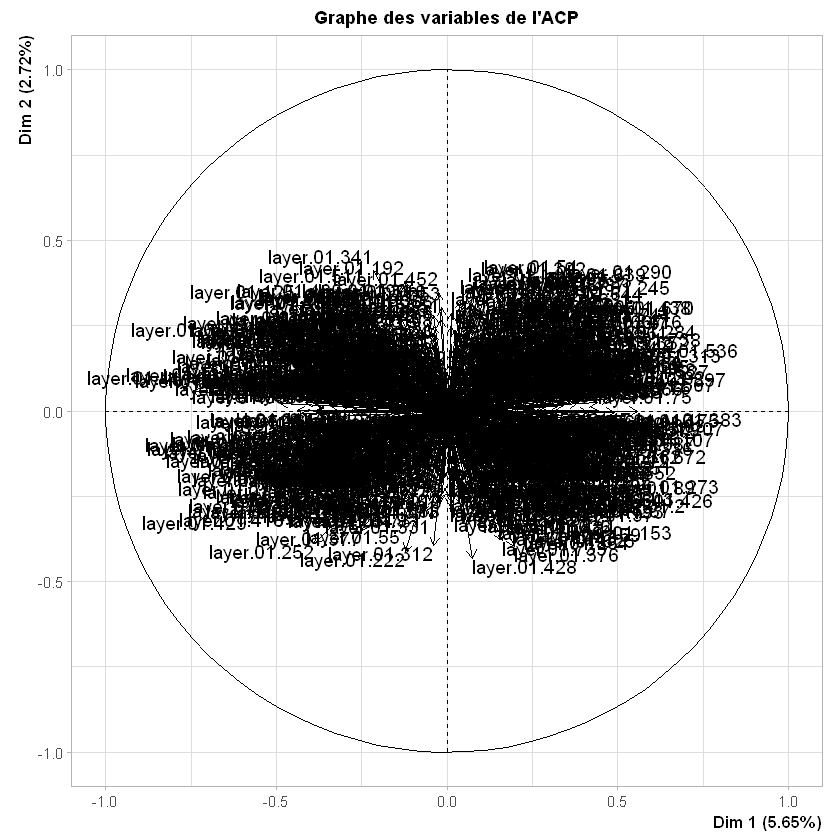

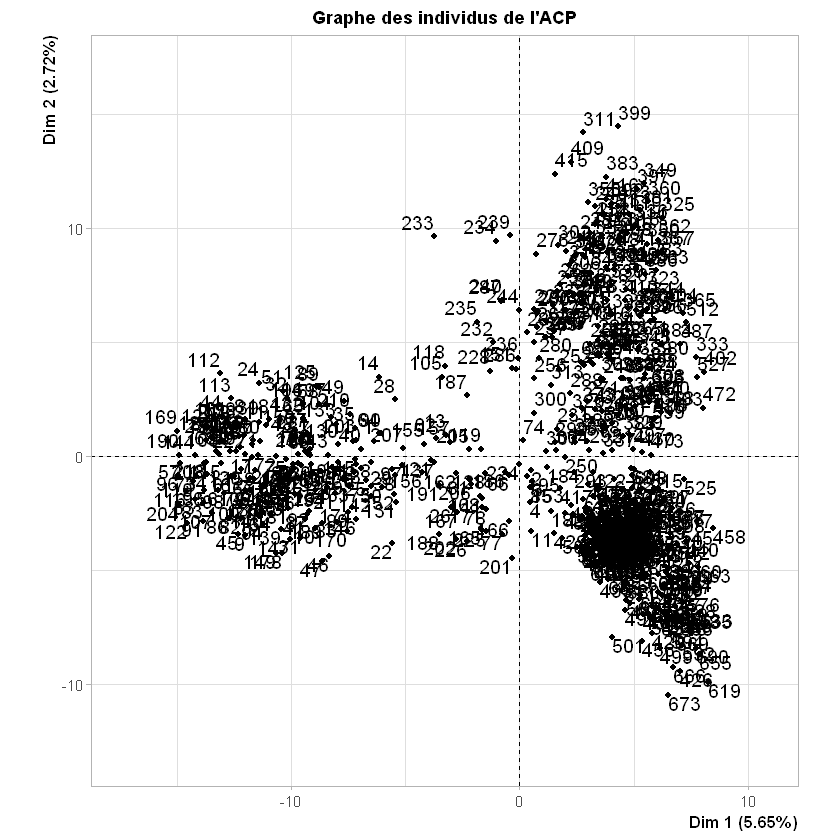

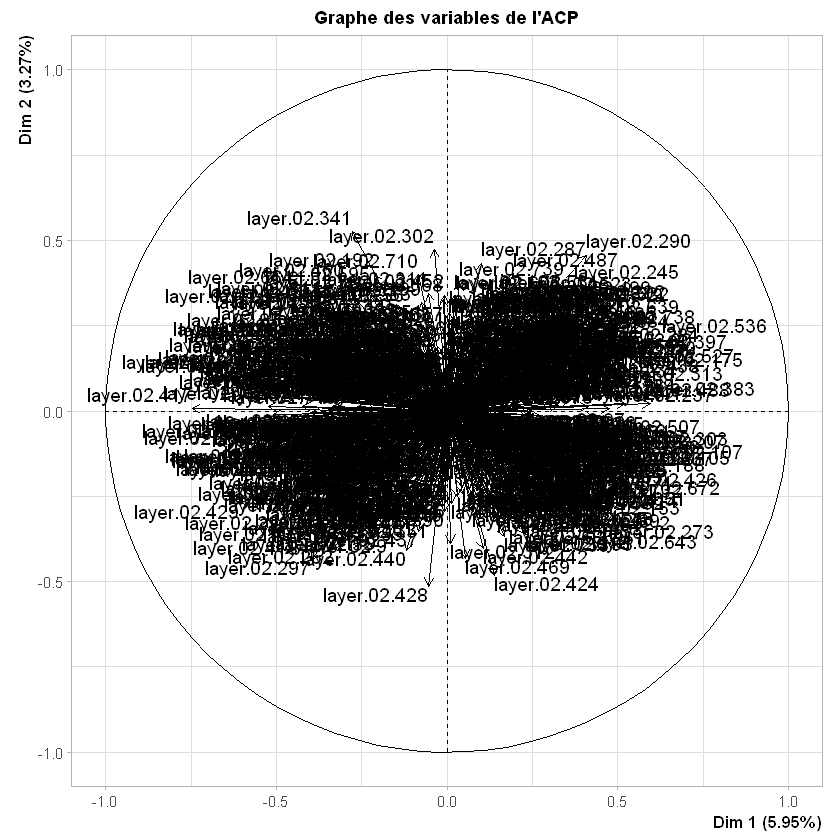

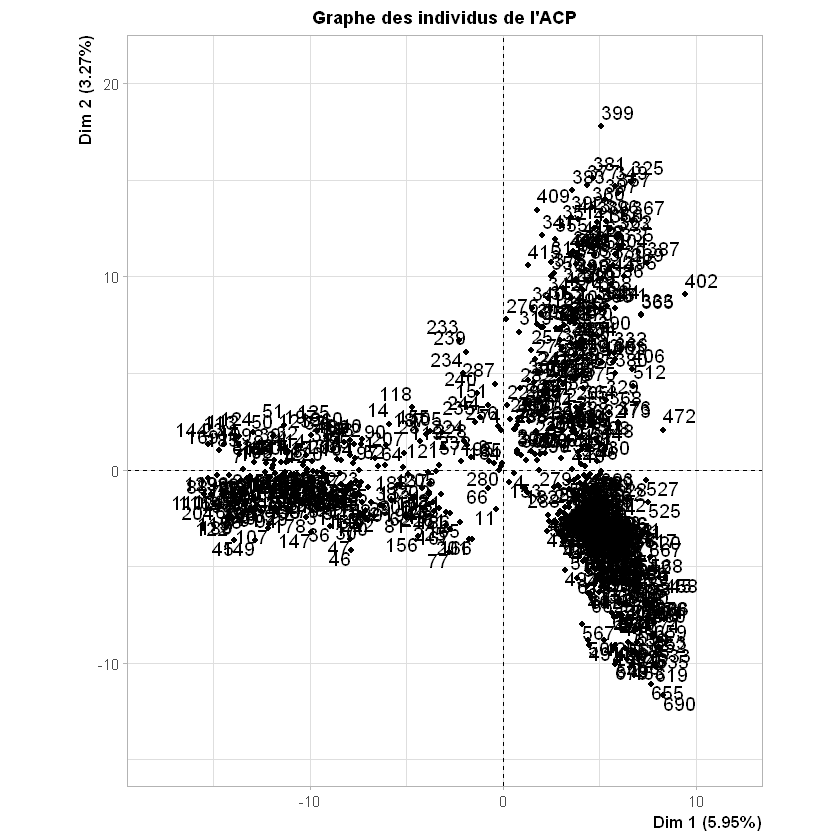

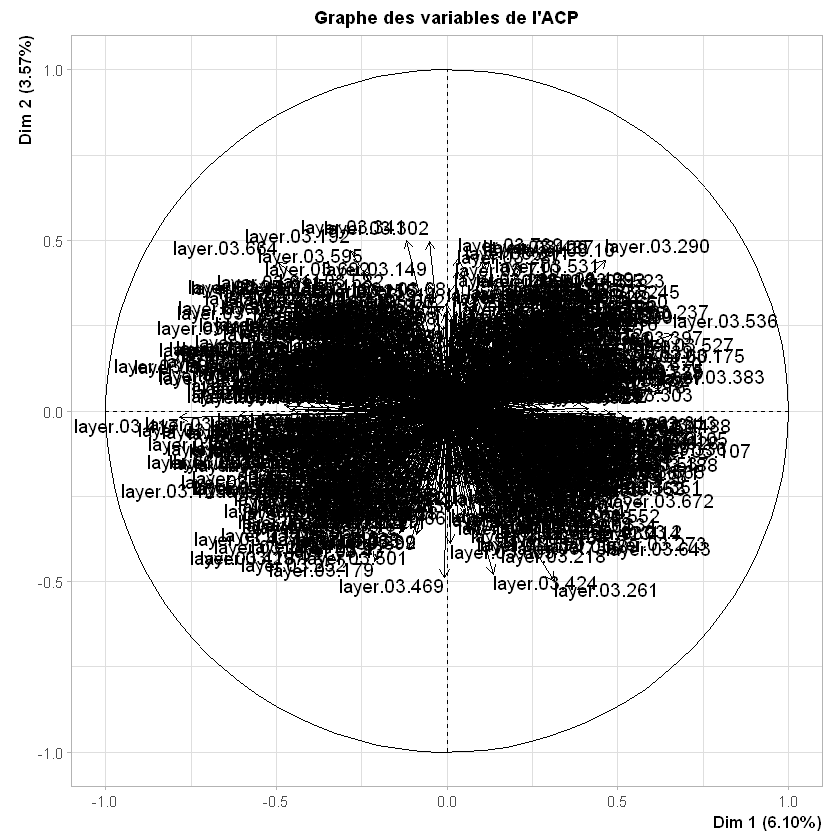

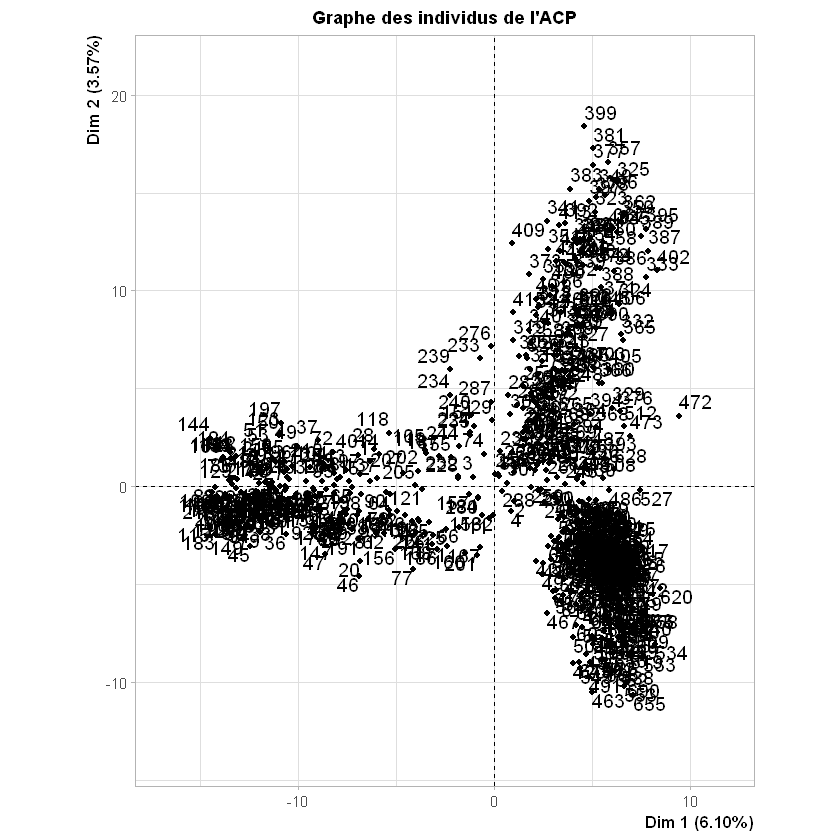

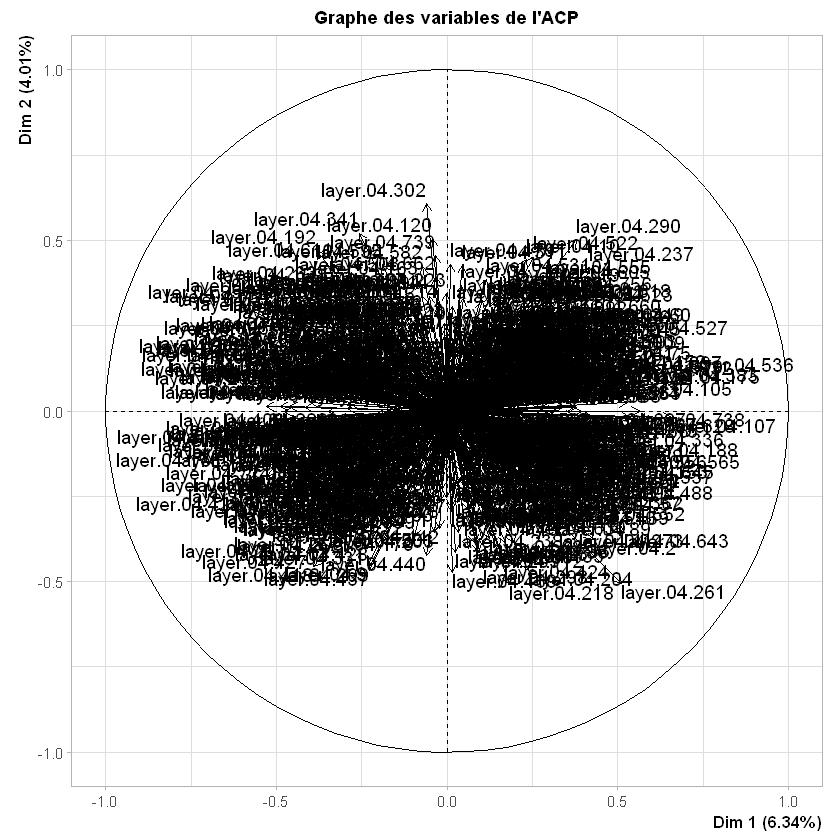

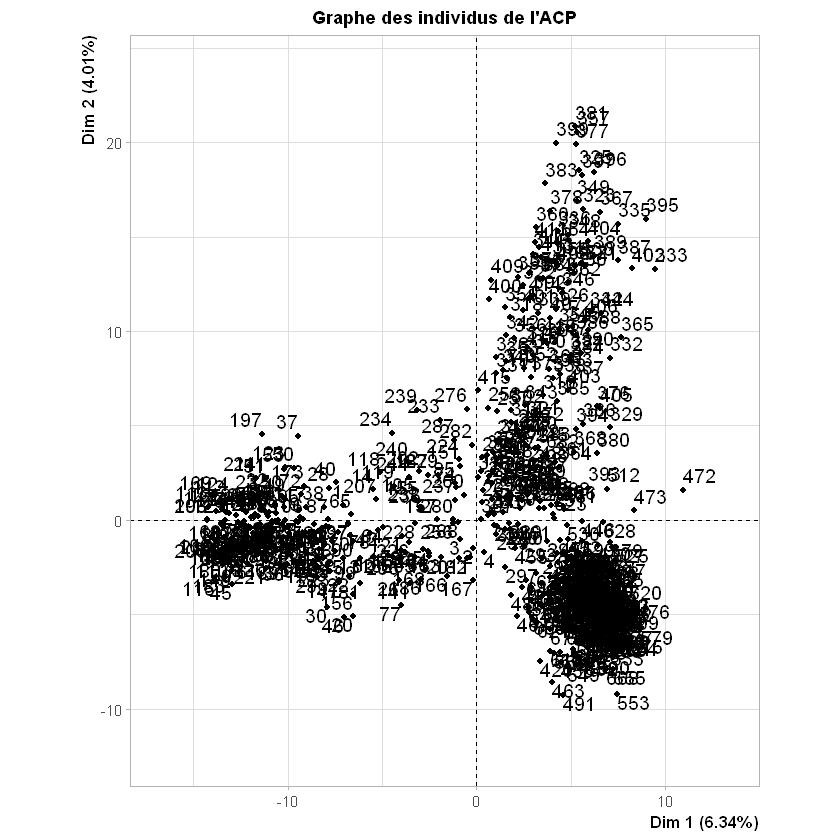

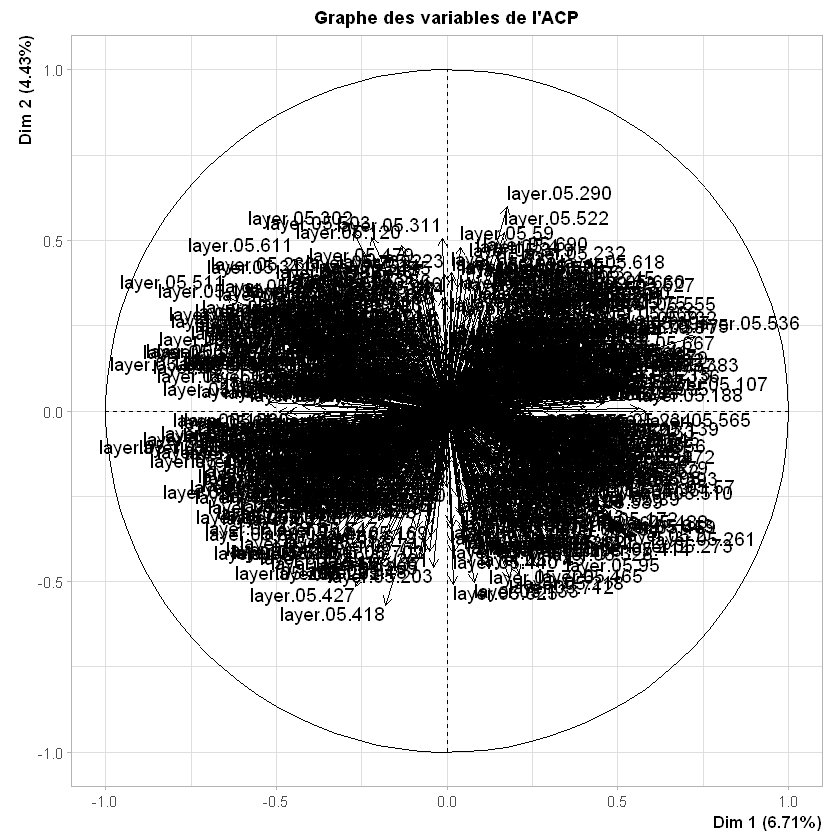

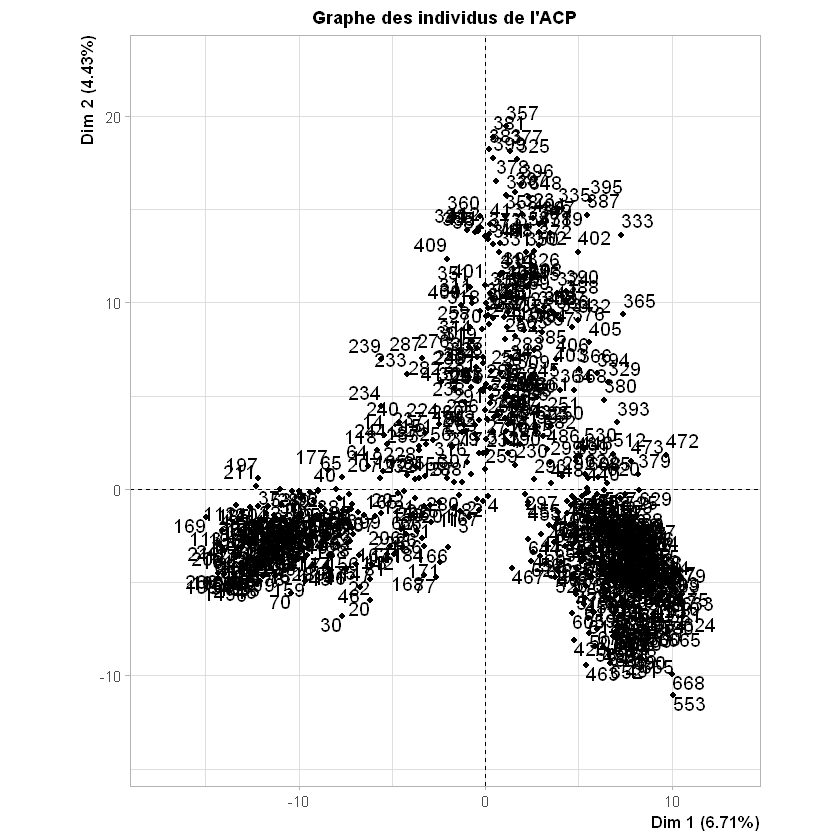

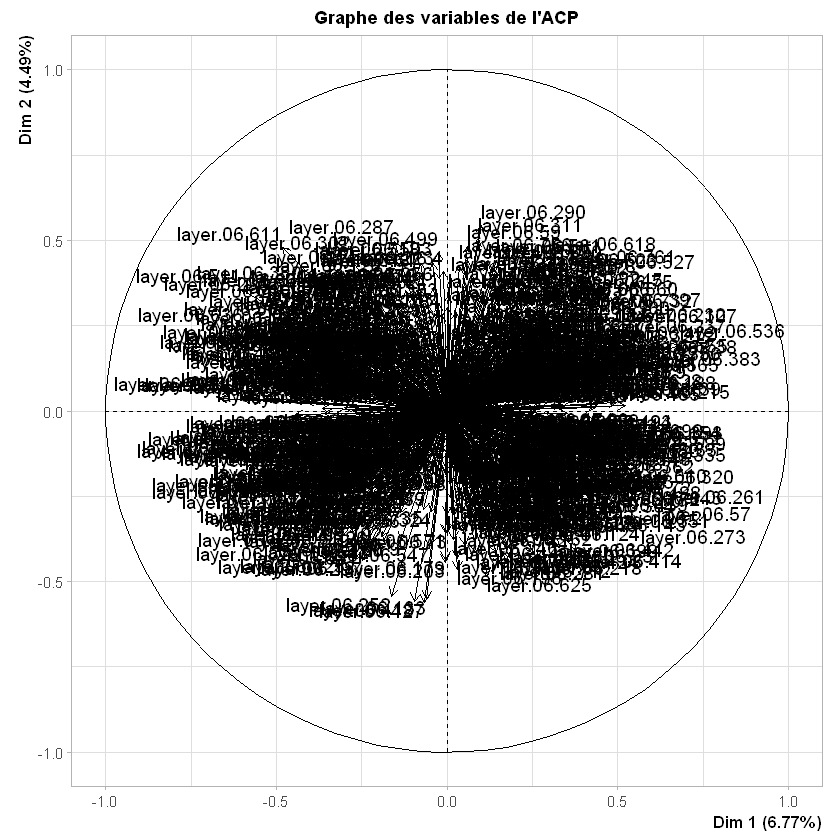

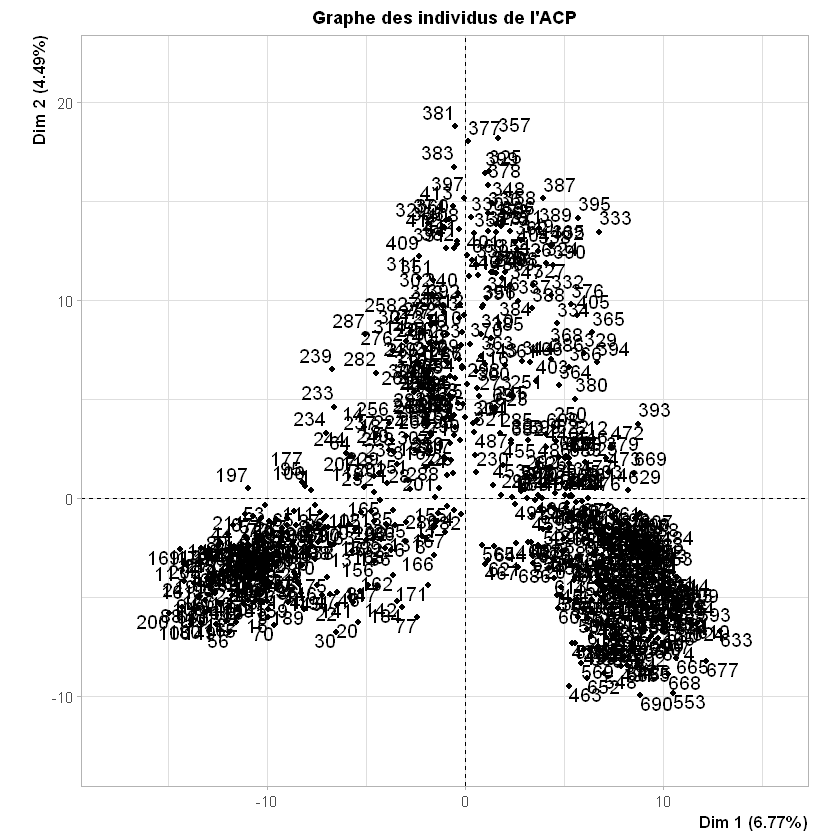

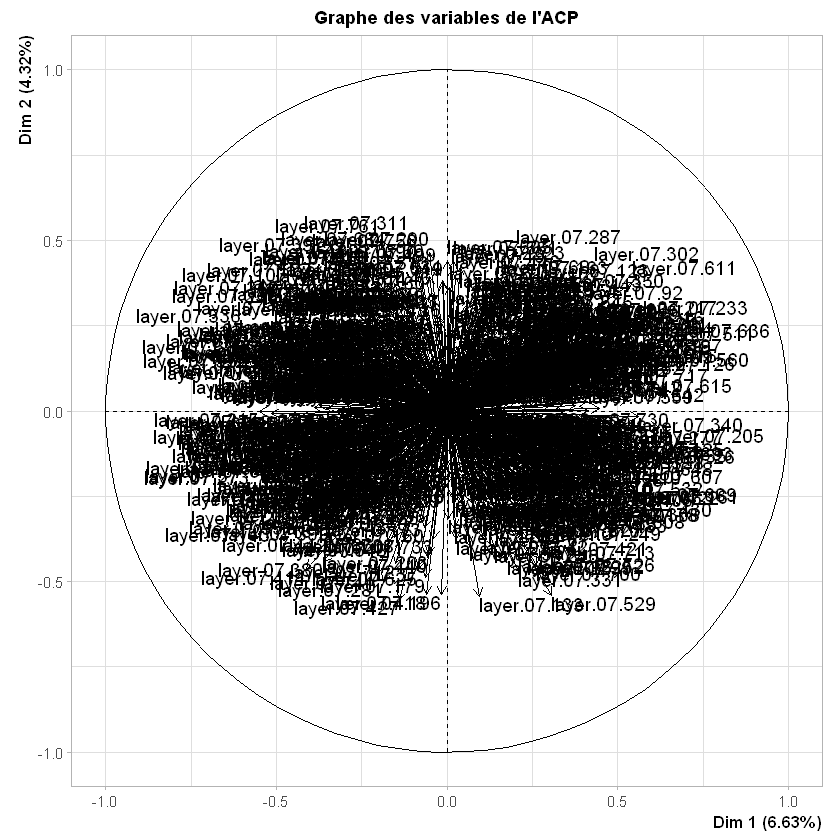

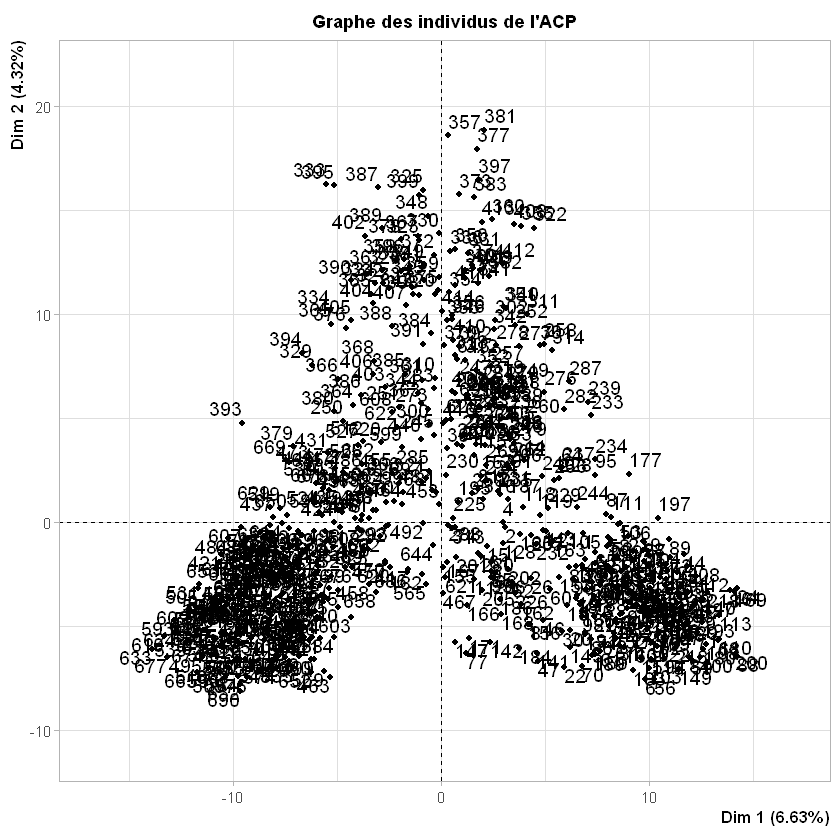

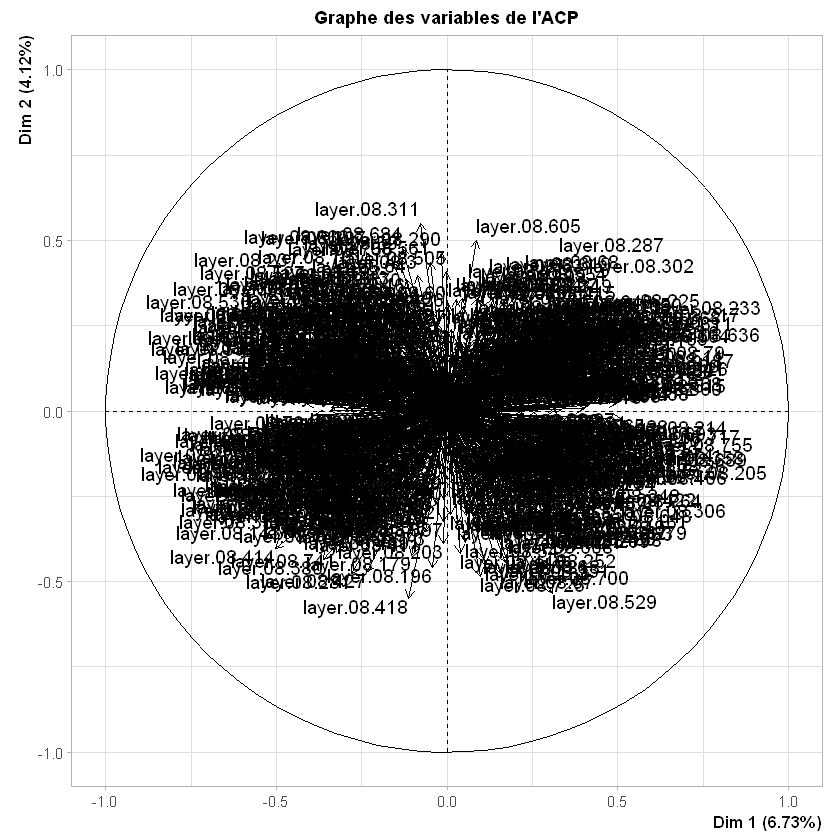

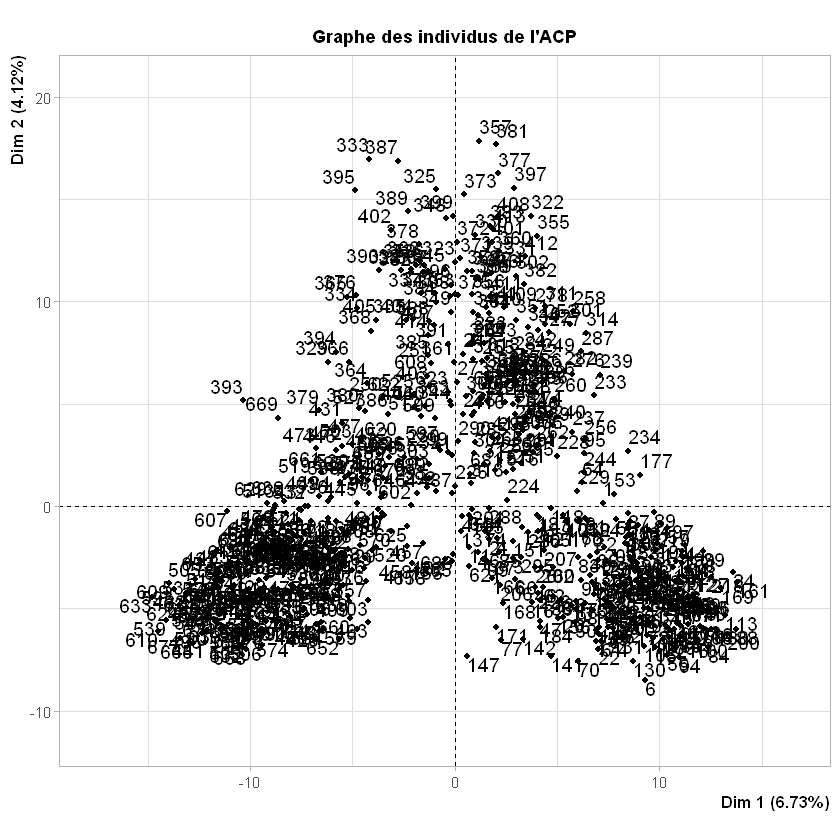

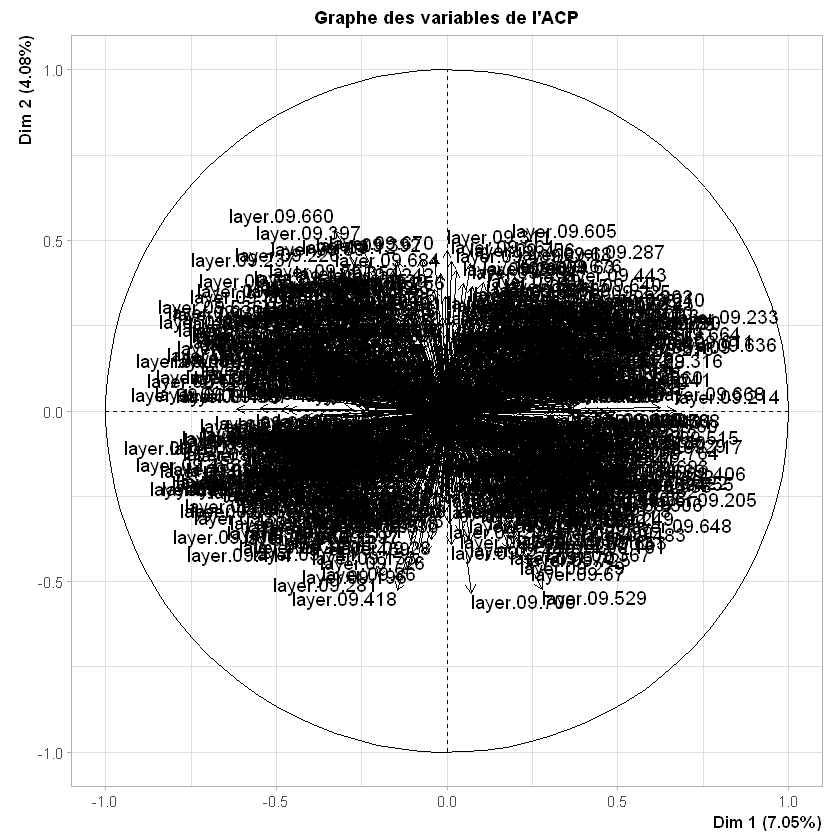

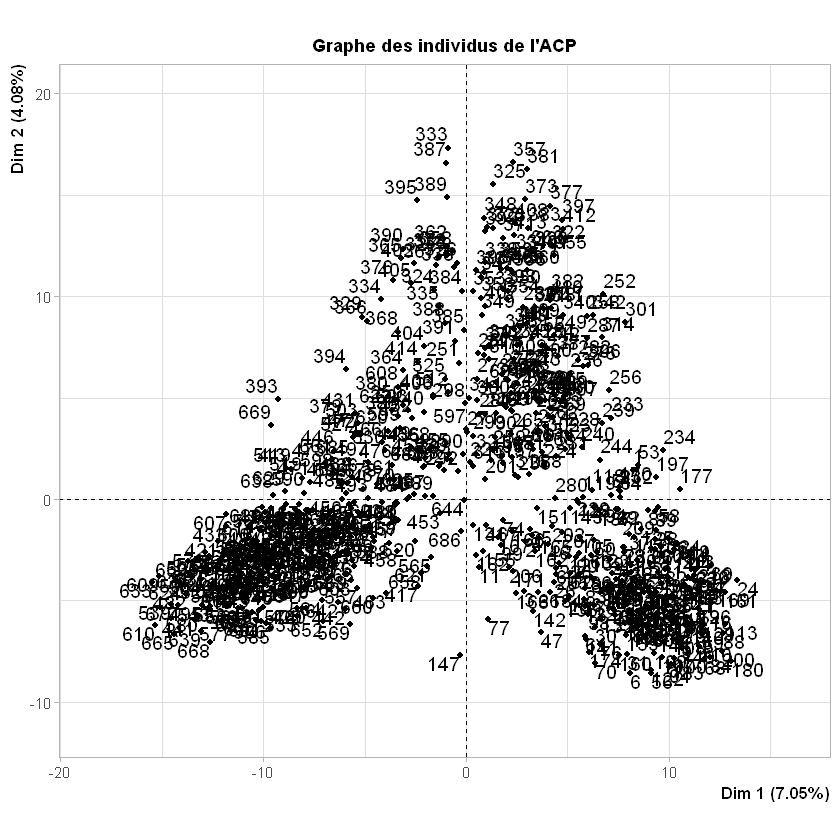

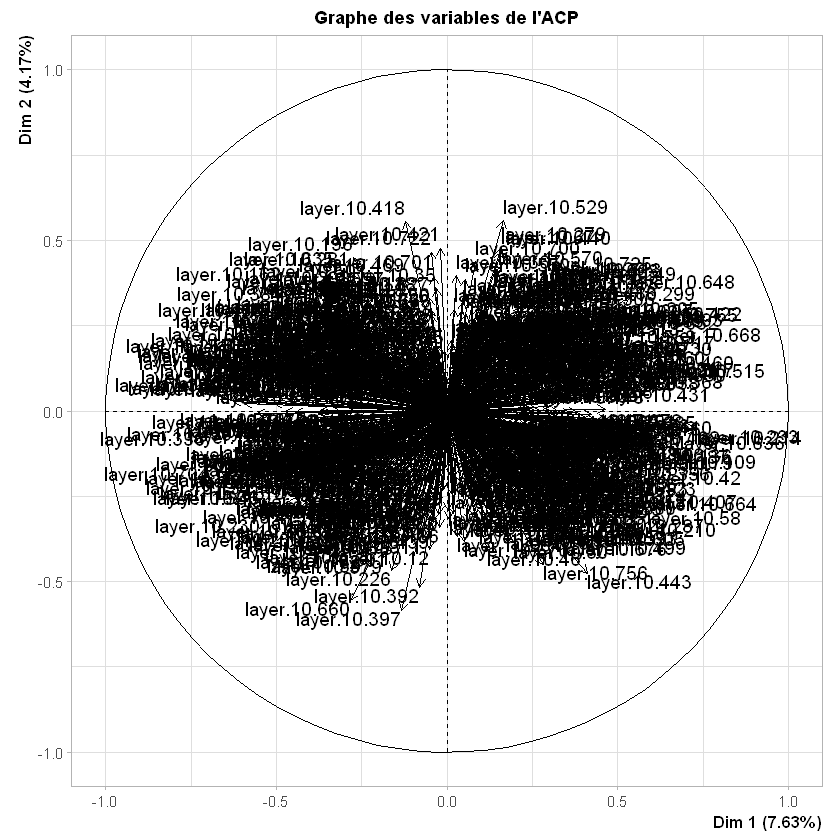

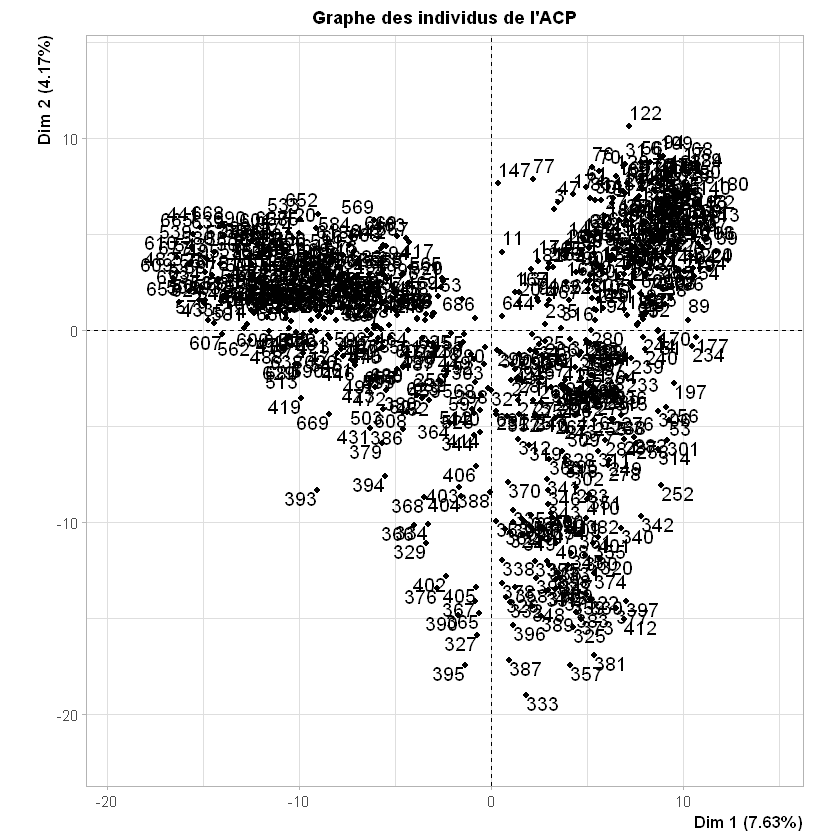

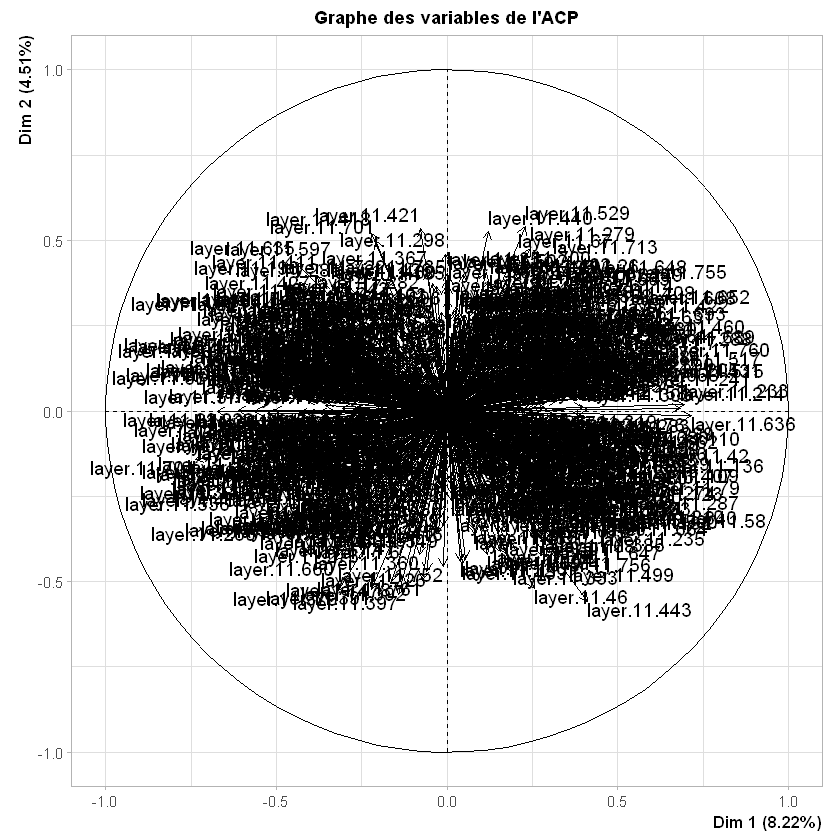

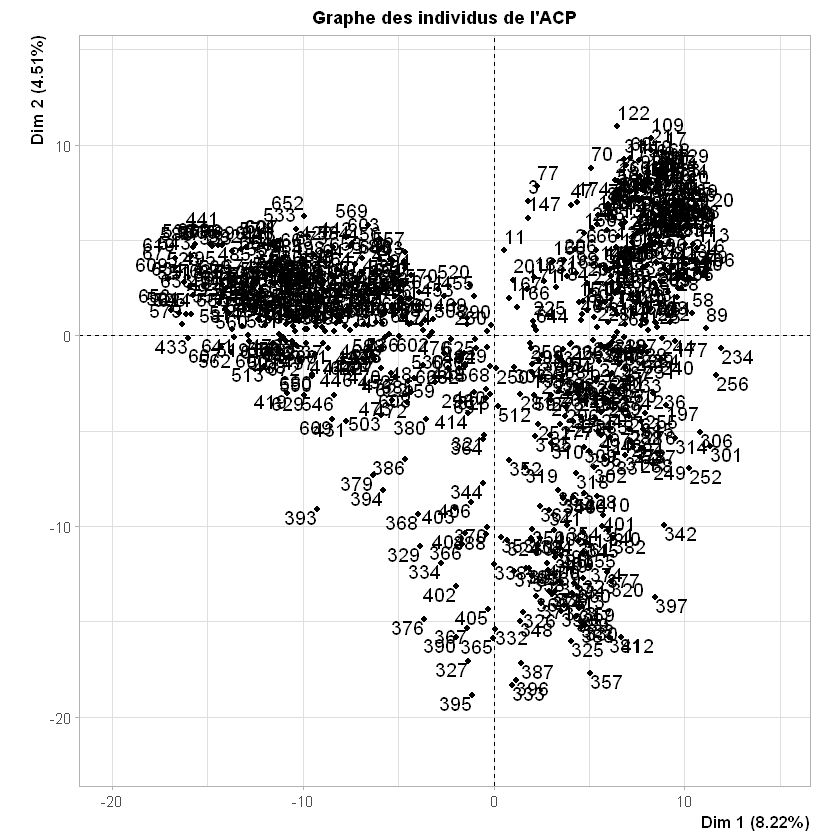

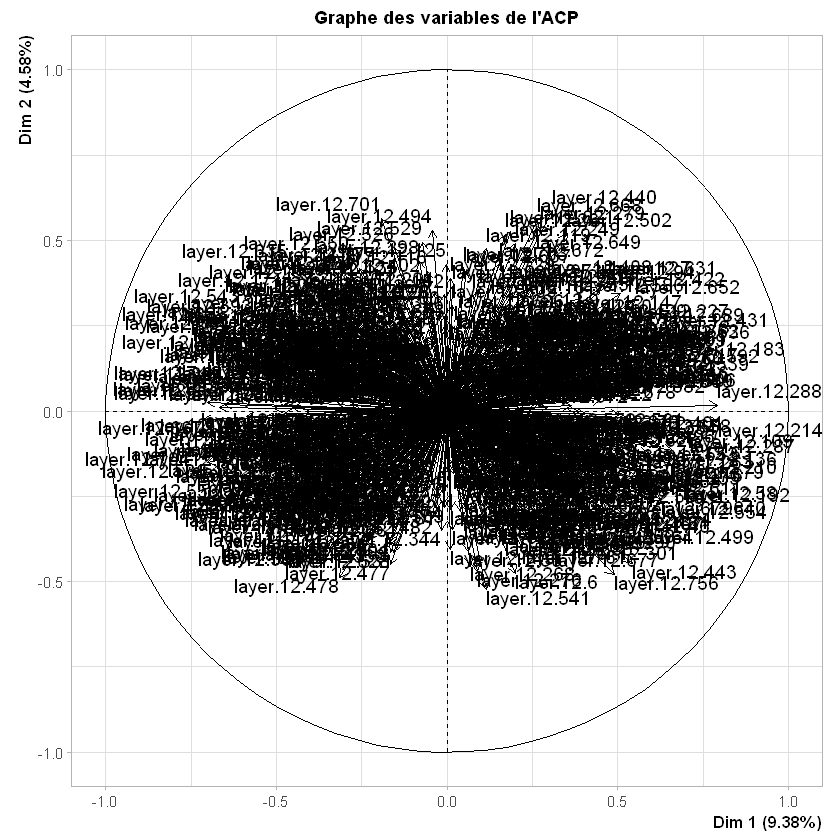

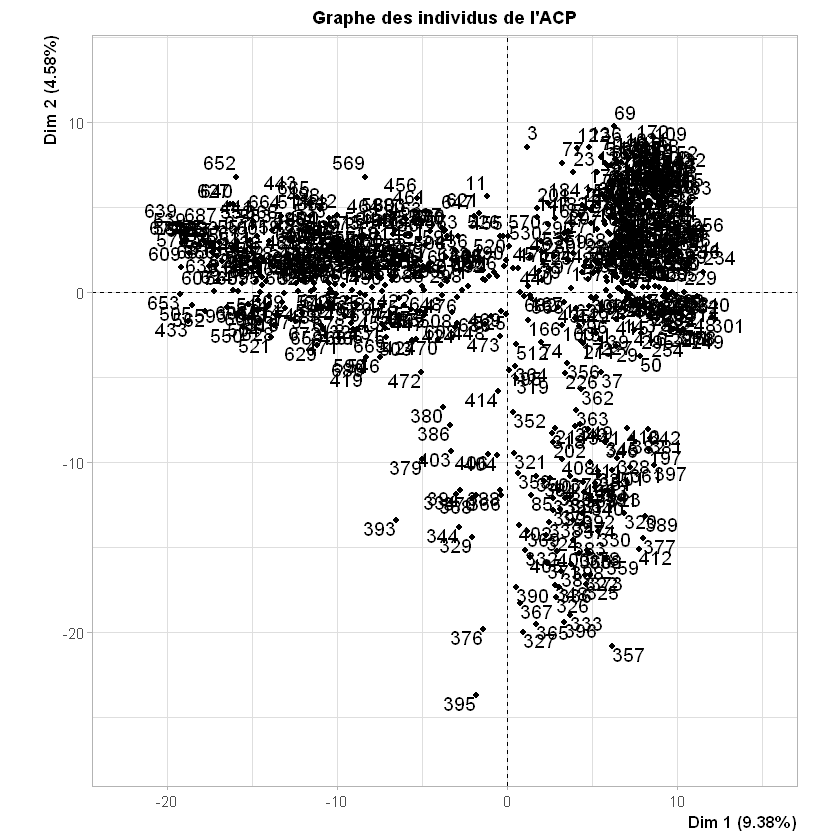

In [20]:
li = c(5,6,7,8,9,10,11,12,13,14,15,16)
for(i in li){
    res2bert.PCA<-PCA(data2.bert[i],graph=FALSE)
    print(plot.PCA(res2bert.PCA,choix='var',title="Graphe des variables de l'ACP"))
    print(plot.PCA(res2bert.PCA,title="Graphe des individus de l'ACP"))
}

In [21]:
li = c(5,6,7,8,9,10,11,12,13,14,15,16)
df2.bert = as.data.frame(data2.bert[li])
res2bert.MFA = MFA(df2.bert, group=c(768,768,768,768,768,768,768,768,768,768,768,768), type=c("s","s","s","s","s","s","s","s","s","s","s","s"), ncp=5, name.group=c("layer1","layer2","layer3","layer4","layer5","layer6","layer7","layer8","layer9","layer10","layer11","layer12"))

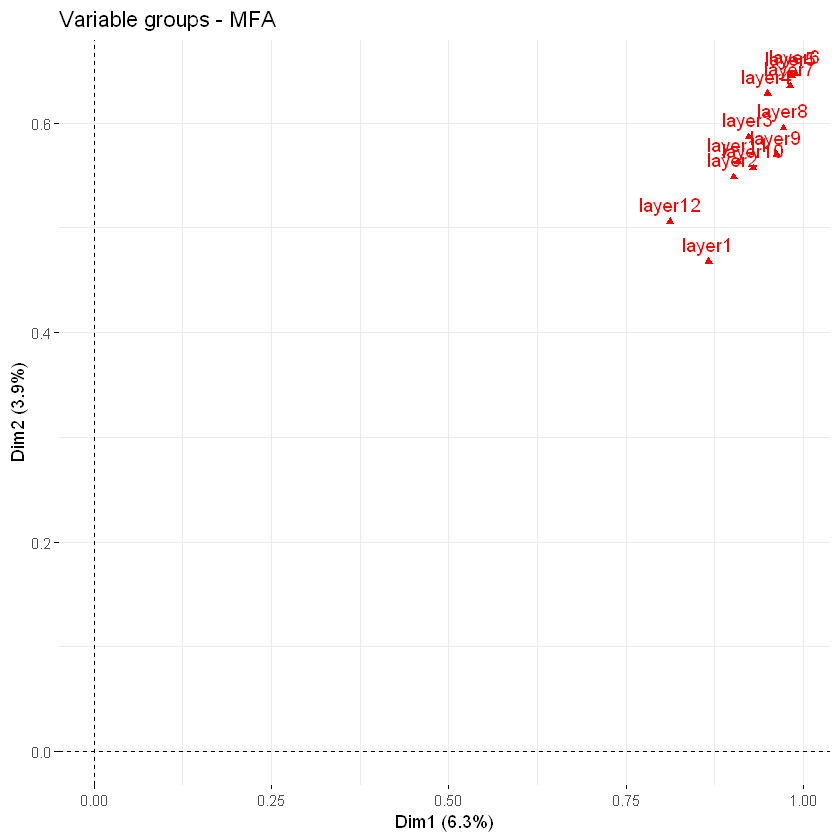

In [22]:
#affichage des groupes
fviz_mfa_var(res2bert.MFA, "group")

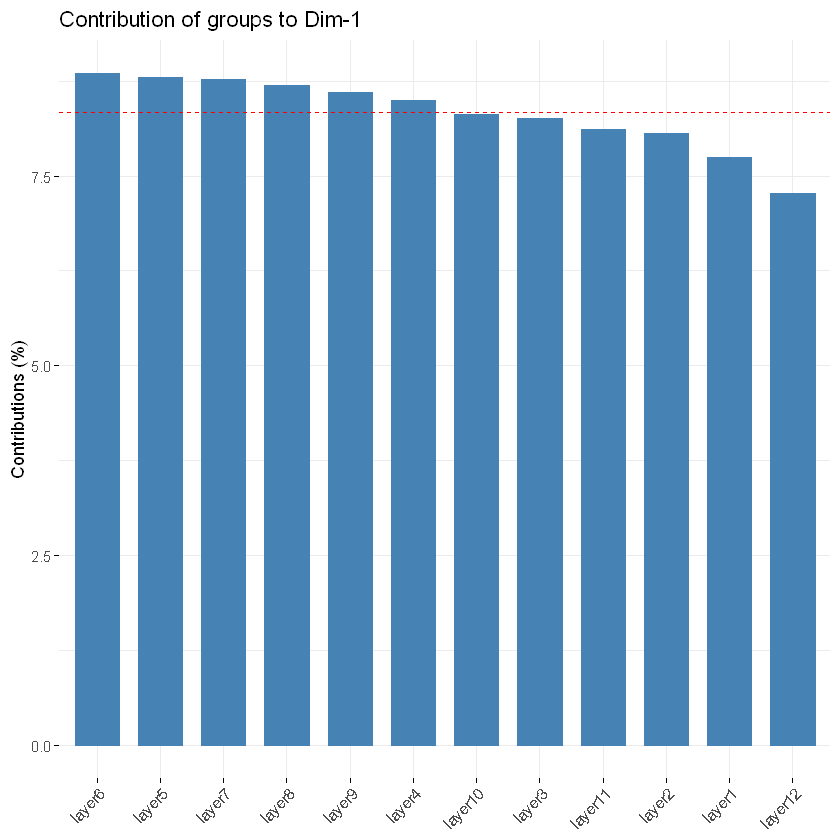

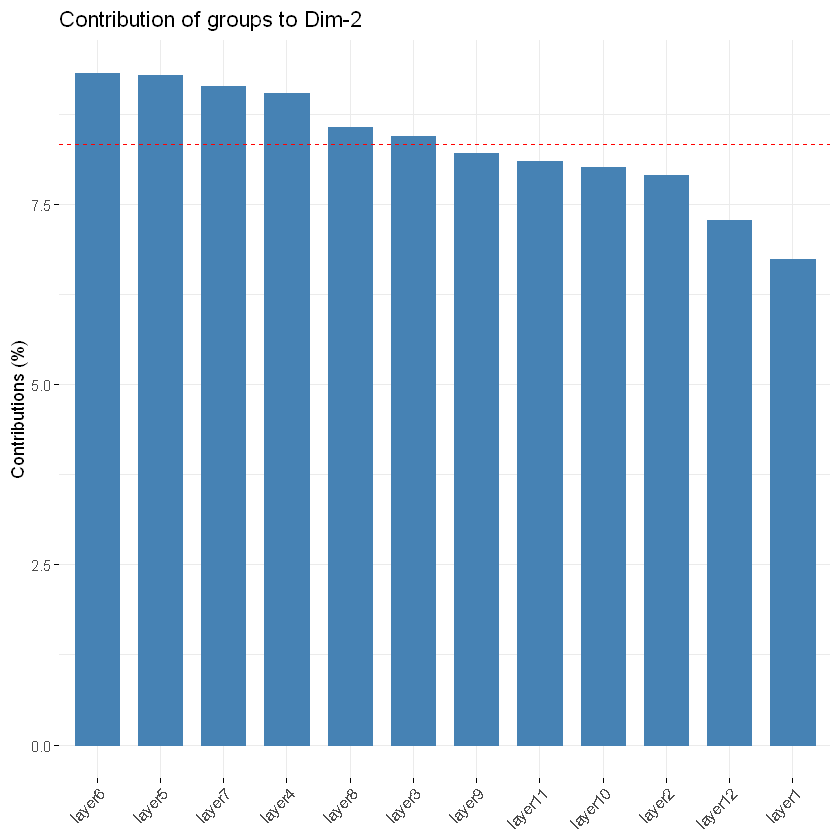

In [23]:
# Contribution à la première dimension
fviz_contrib (res2bert.MFA, "group", axes = 1)
# Contribution à la deuxième dimension
fviz_contrib (res2bert.MFA, "group", axes = 2)

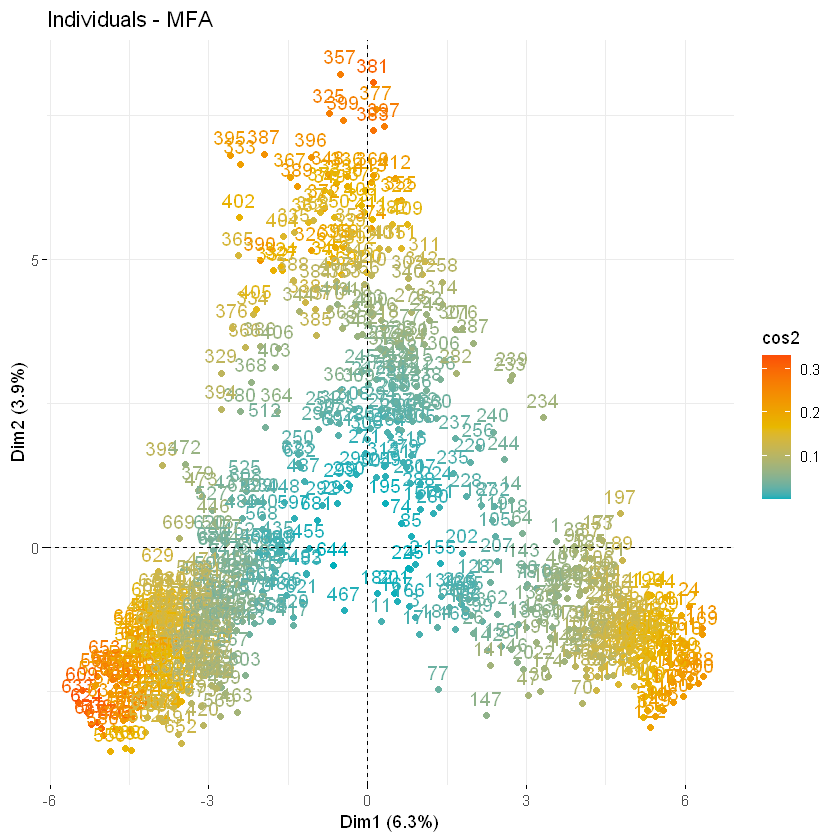

In [58]:
#graphe des individus
fviz_mfa_ind(res2bert.MFA, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = FALSE)

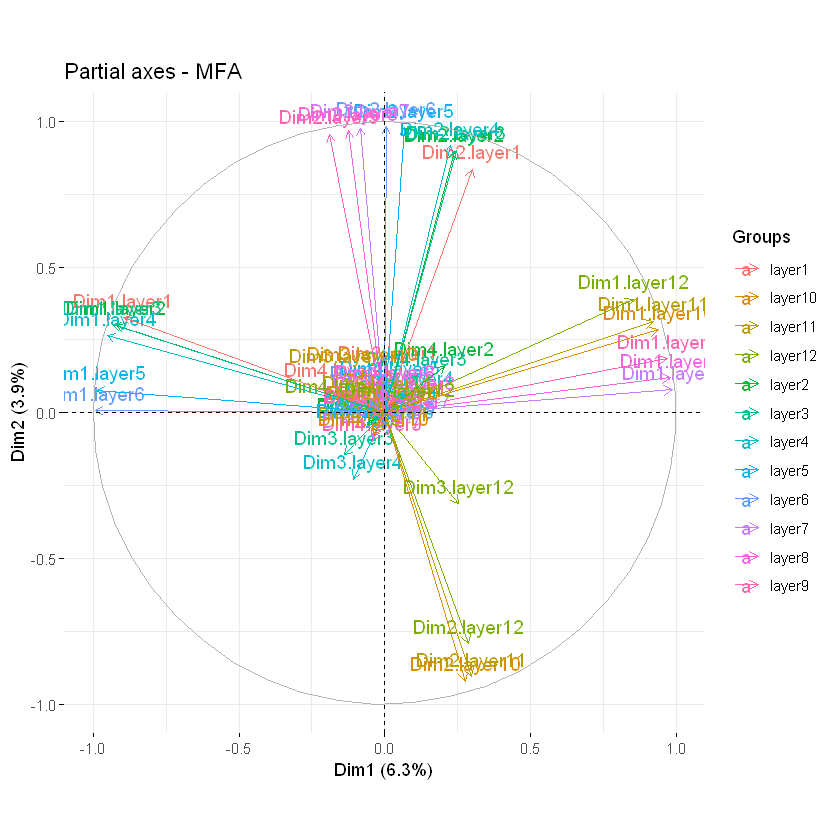

In [59]:
mycolors <- colorRampPalette(brewer.pal(8, "Set2"))(12)
fviz_mfa_axes (res2bert.MFA)

In [60]:
# maintenant on va garder que les 20 premières composantes principales
res2bert.MFA = MFA(df2.bert, group=c(768,768,768,768,768,768,768,768,768,768,768,768), type=c("s","s","s","s","s","s","s","s","s","s","s","s"), ncp=20, name.group=c("layer1","layer2","layer3","layer4","layer5","layer6","layer7","layer8","layer9","layer10","layer11","layer12"))
str(res2bert.MFA)

List of 11
 $ separate.analyses:List of 12
  ..$ layer1 :List of 5
  .. ..$ eig : num [1:690, 1:3] 43.4 20.9 19.5 18 12.6 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:690] "comp 1" "comp 2" "comp 3" "comp 4" ...
  .. .. .. ..$ : chr [1:3] "eigenvalue" "percentage of variance" "cumulative percentage of variance"
  .. ..$ var :List of 4
  .. .. ..$ coord  : num [1:768, 1:20] -0.362 0.456 -0.104 0.107 0.135 ...
  .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. ..$ : chr [1:768] "layer.01.1" "layer.01.2" "layer.01.3" "layer.01.4" ...
  .. .. .. .. ..$ : chr [1:20] "Dim.1" "Dim.2" "Dim.3" "Dim.4" ...
  .. .. ..$ cor    : num [1:768, 1:20] -0.362 0.456 -0.104 0.107 0.135 ...
  .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. ..$ : chr [1:768] "layer.01.1" "layer.01.2" "layer.01.3" "layer.01.4" ...
  .. .. .. .. ..$ : chr [1:20] "Dim.1" "Dim.2" "Dim.3" "Dim.4" ...
  .. .. ..$ cos2   : num [1:768, 1:20] 0.1308 0.2081 0.0108 0.0114 0.0183 ...
  .. .. ..

In [61]:
#récupiration du resultat du MFA :
df2bert_20<- data.frame(res2bert.MFA$separate.analyses$layer1$ind$coord,
                      res2bert.MFA$separate.analyses$layer2$ind$coord,
                      res2bert.MFA$separate.analyses$layer3$ind$coord,
                      res2bert.MFA$separate.analyses$layer4$ind$coord,
                      res2bert.MFA$separate.analyses$layer5$ind$coord,
                      res2bert.MFA$separate.analyses$layer6$ind$coord,
                      res2bert.MFA$separate.analyses$layer7$ind$coord,
                      res2bert.MFA$separate.analyses$layer8$ind$coord,
                      res2bert.MFA$separate.analyses$layer9$ind$coord,
                      res2bert.MFA$separate.analyses$layer10$ind$coord,
                      res2bert.MFA$separate.analyses$layer11$ind$coord,
                      res2bert.MFA$separate.analyses$layer12$ind$coord)

In [62]:
#utilisation de NB clust pour deviner le nb de cluster qu'on va donner au k-means
res<-NbClust(df2bert_20, distance = "euclidean", min.nc=2, max.nc=6, method = "kmeans", index = "kl")
k = as.numeric(res$Best.nc[1])

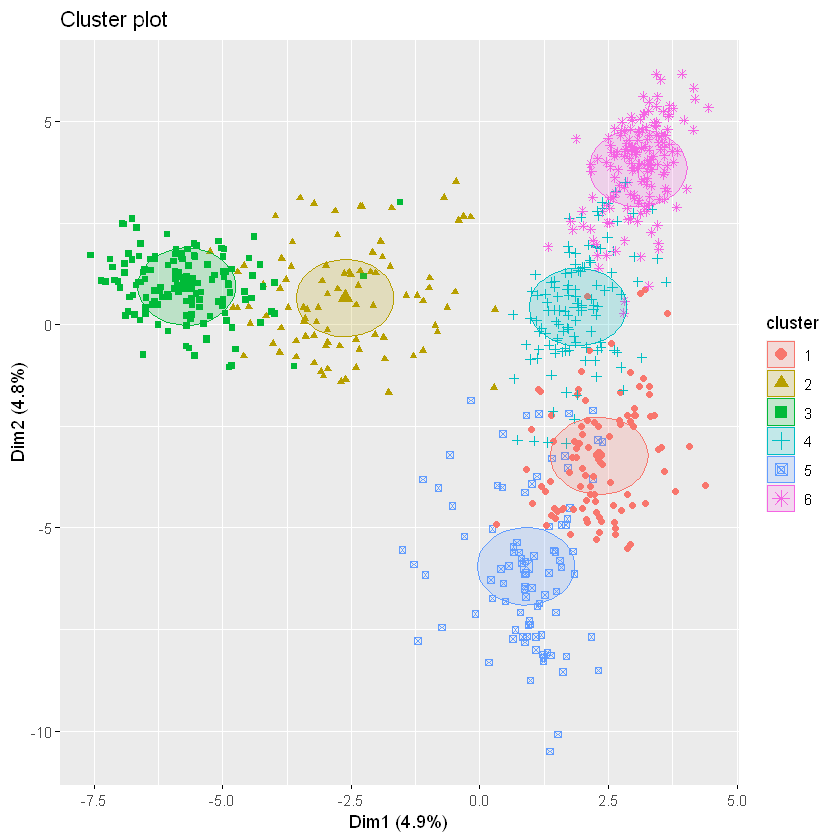

In [63]:
#k-means
res2bert.km = kmeans(df2bert_20, k, nstart = 25)
fviz_cluster(res2bert.km, data = df2bert_20, geom = c("point"),ellipse.type = "euclid")

Warning message in get_col(col, k):
"Length of color vector was longer than the number of clusters - first k elements are used"


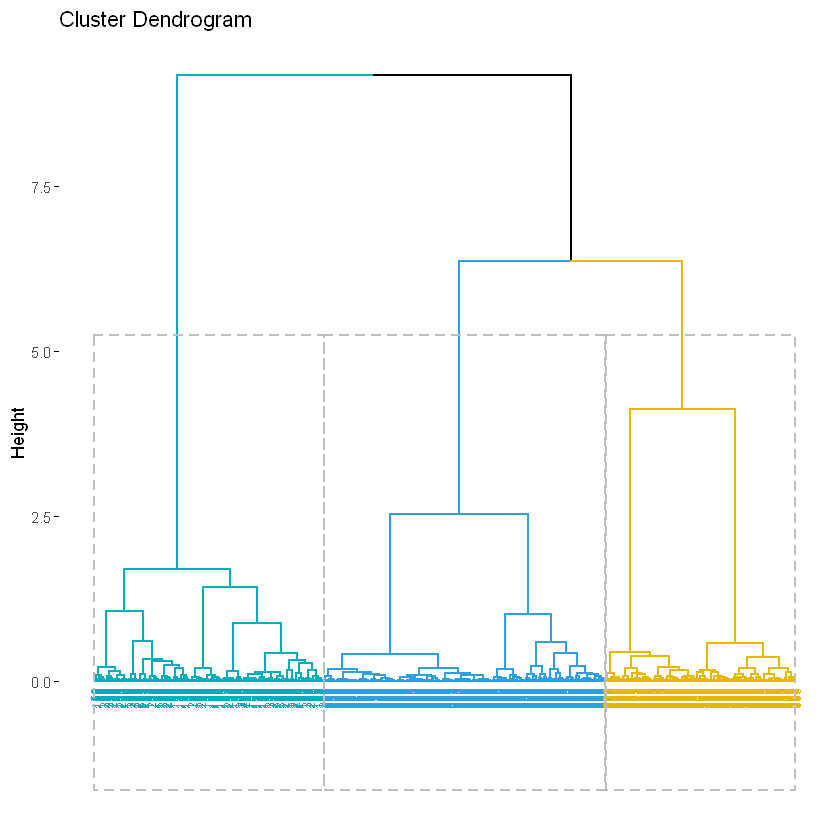

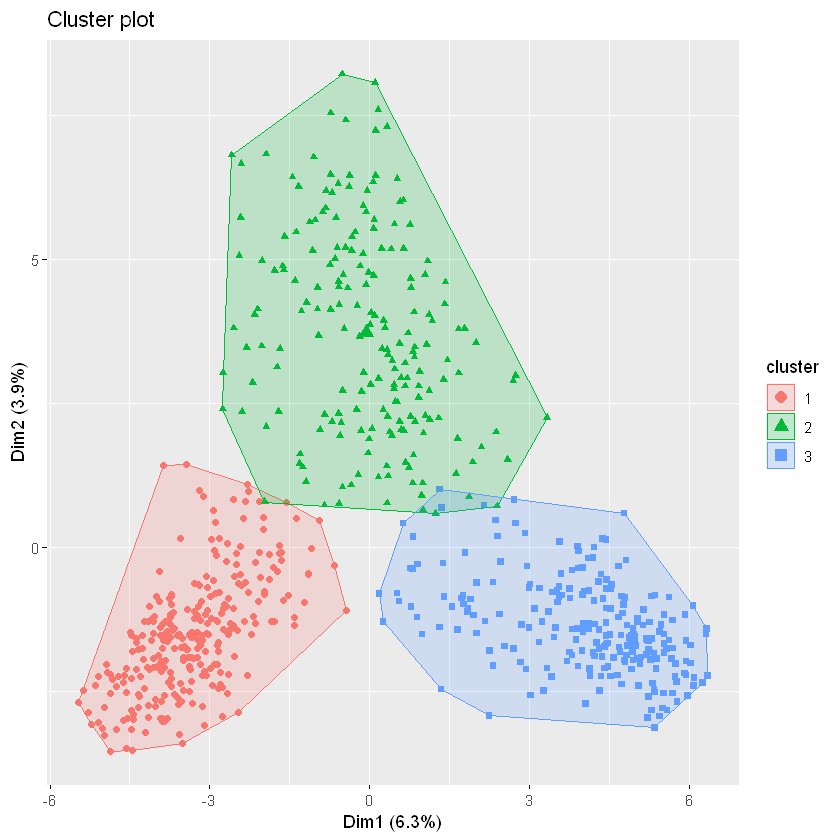

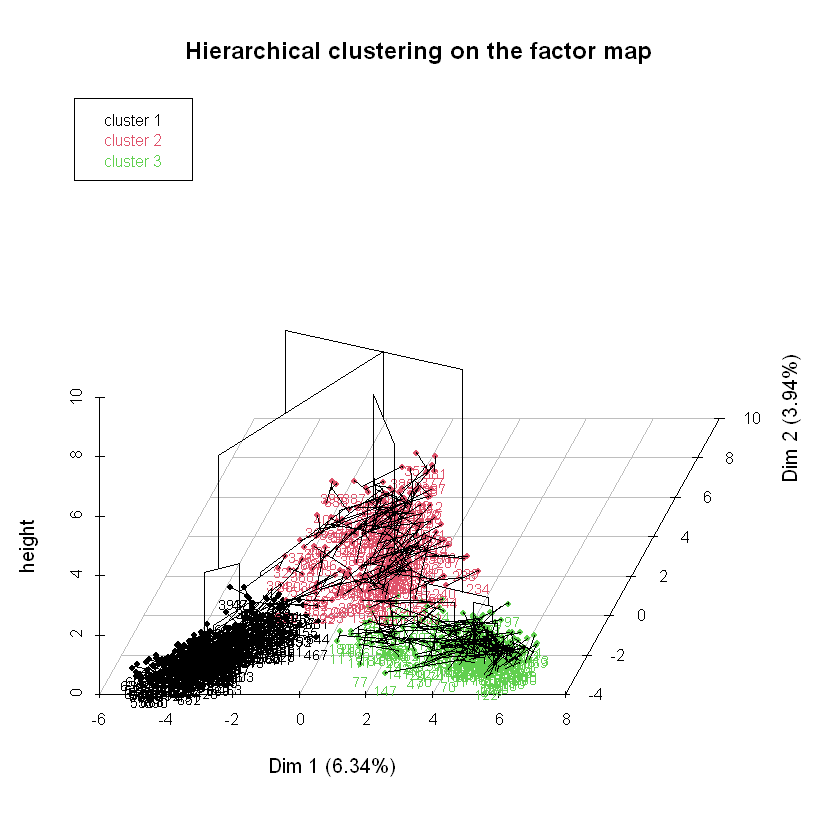

In [64]:
#cah (hcpc) ward
res2bert.hcpc.ward = HCPC (res2bert.MFA, nb.clust = 0,method="ward", graph = FALSE)
fviz_dend(res2bert.hcpc.ward, rect = TRUE, cex = 0.5,k_colors = c("#00AFBB","#2E9FDF", "#E7B800", "#FC4E07"))
fviz_cluster(res2bert.hcpc.ward, data = df2bert_20, geom = c("point"))
plot(res2bert.hcpc.ward, choice="3D.map", angle=60)


Warning message in get_col(col, k):
"Length of color vector was shorter than the number of clusters - color vector was recycled"


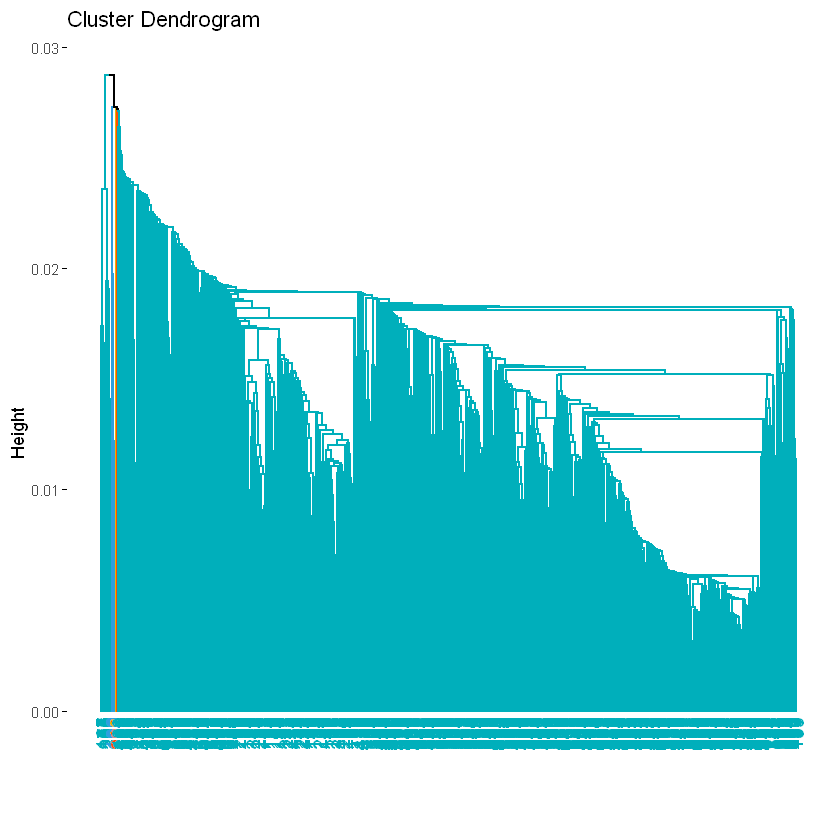

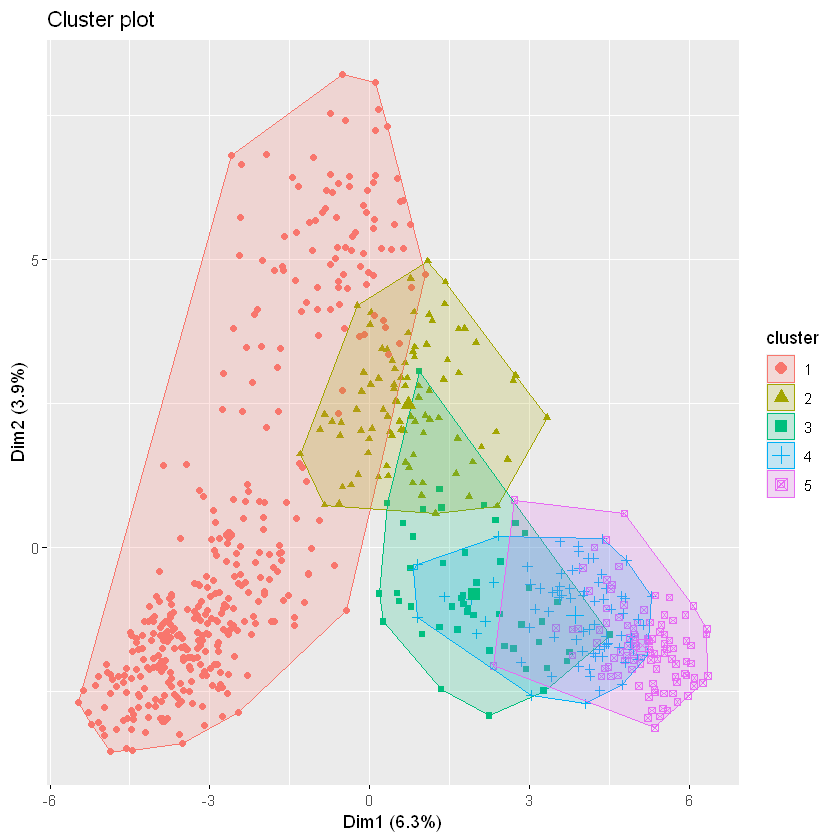

In [66]:
#cah (hcpc) single - minimum
res2bert.hcpc.single = HCPC (res2bert.MFA, nb.clust = 0,method="single", graph = FALSE)
fviz_dend(res2bert.hcpc.single,k_colors = c("#00AFBB","#2E9FDF", "#E7B800", "#FC4E07"))
fviz_cluster(res2bert.hcpc.single, data = df2bert_20, geom = c("point"))


Warning message in get_col(col, k):
"Length of color vector was longer than the number of clusters - first k elements are used"


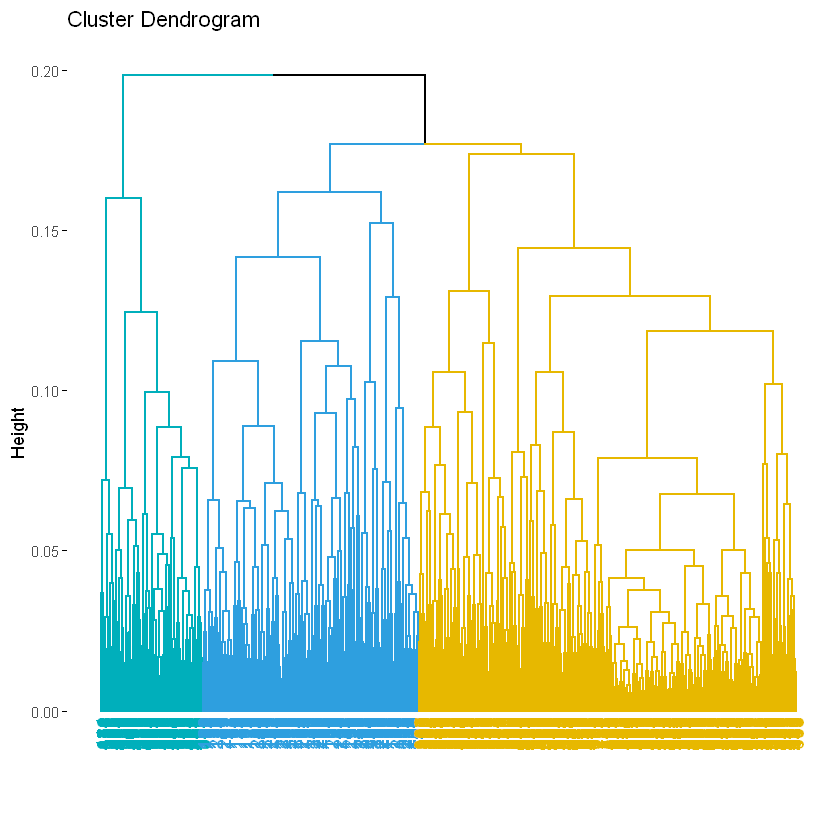

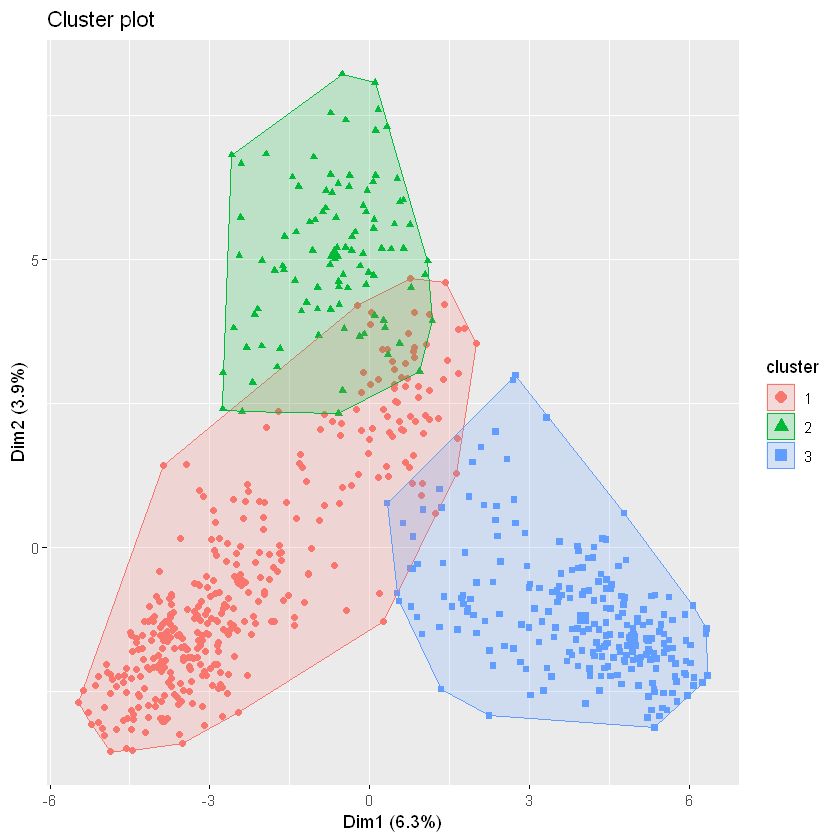

In [67]:
#cah (hcpc) complete - max
res2bert.hcpc.complete = HCPC (res2bert.MFA, nb.clust = 0,method="complete", graph = FALSE)
fviz_dend(res2bert.hcpc.complete,k_colors = c("#00AFBB","#2E9FDF", "#E7B800", "#FC4E07"))
fviz_cluster(res2bert.hcpc.complete, data = df2bert_20, geom = c("point"))

Warning message in get_col(col, k):
"Length of color vector was longer than the number of clusters - first k elements are used"


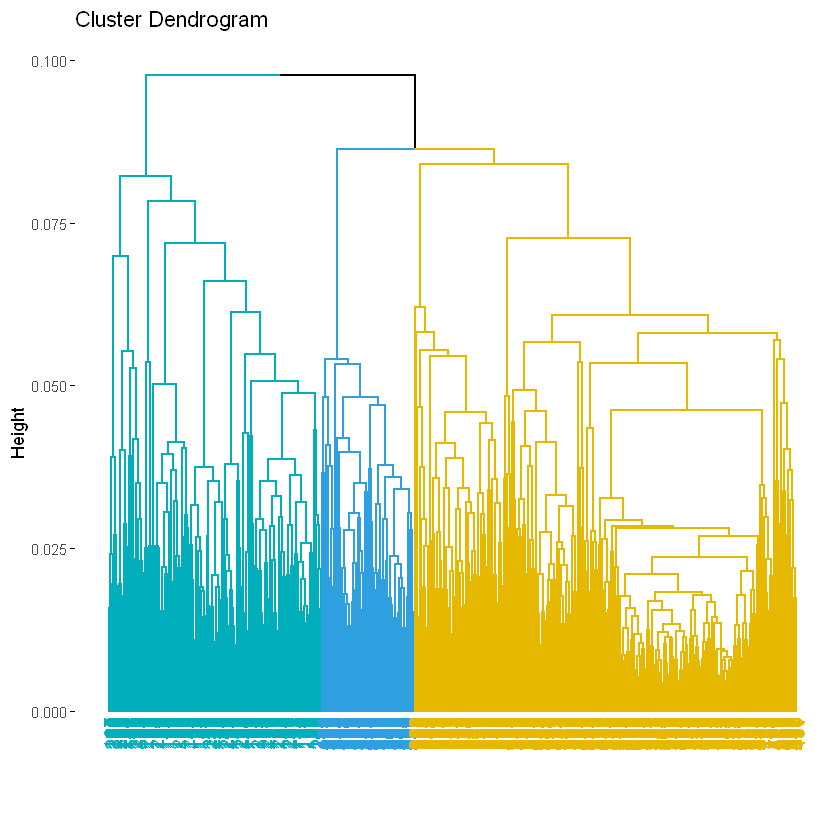

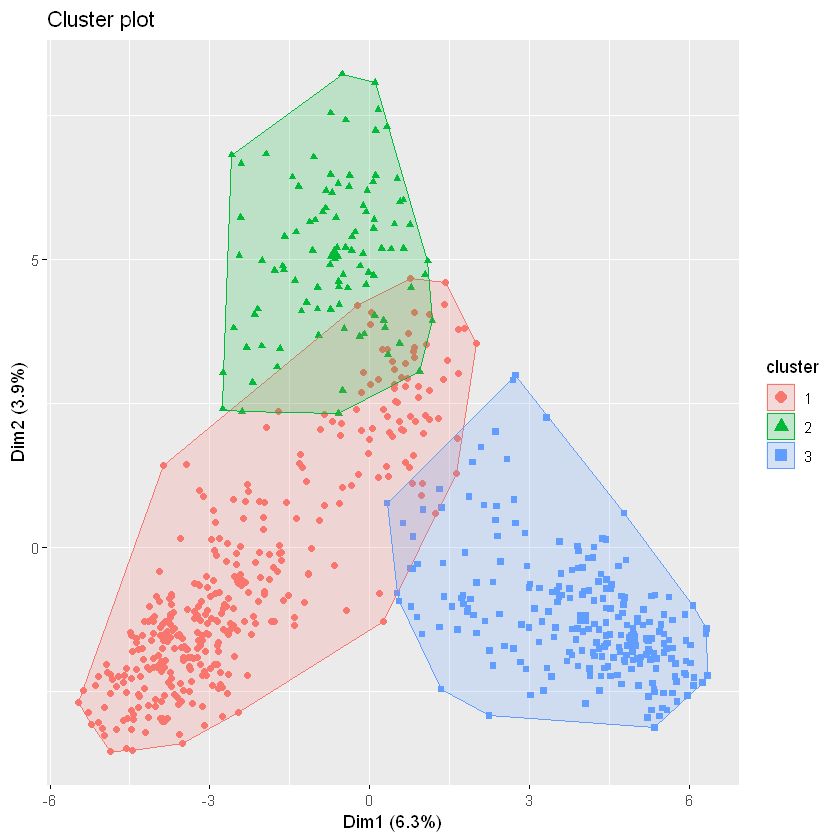

In [68]:
#cah (hcpc) average
res2bert.hcpc.average = HCPC (res2bert.MFA, nb.clust = 0,method="average", graph = FALSE)
fviz_dend(res2bert.hcpc.average,k_colors = c("#00AFBB","#2E9FDF", "#E7B800", "#FC4E07"))
fviz_cluster(res2bert.hcpc.average, data = df2bert_20, geom = c("point"))

# Evaluation	de	la démarche

 - Accuracy :
   - il indique le pourcentage de bonnes prédictions. 
   - accuracy = ( vrai positive + vrai négatif ) / total
   - Avantages :
      - C’est un très bon indicateur et très simple à comprendre.
   - Inconvénients :
      - Parfois une bonne accuracy ca veut pas dire qu'on a fais un bon clustering
 - Purity :
   - Nous attribuons une étiquette à chaque cluster en fonction de la classe la plus fréquente dans celui-ci.
     La pureté devient le nombre d'étiquettes de classe et de cluster correctement appariées divisé par le nombre 
     total de   points de données.
   - Avantages : 
       - trés facile à comprendre et à calculer
   - Inconvénients : 
       - En général, la pureté augmente lorsque le nombre de clusters augmente. Par exemple, si nous avons un modèle 
         qui regroupe chaque observation dans un cluster séparé, la pureté devient un. Pour cette raison, la pureté 
         ne peut pas être utilisée comme un compromis entre le nombre de clusters et la qualité du clustering.
 - NMI :
   - Le NMI nous indique dans quelle mesure l'incertitude sur les étiquettes de classe diminue lorsque nous connaissons 
     les étiquettes des clusters. 
   - Avantages :
     - L'un des avantages de NMI est que nous pouvons l'utiliser pour comparer différents modèles de clustering 
       qui ont un nombre différent de clusters, car NMI est normalisé.
 - ARI :
   - L'indice de Rand (RI) est une mesure de la similarité entre deux regroupements. Nous pouvons l'utiliser pour comparer 
     les étiquettes de classe réelles et les étiquettes de cluster prédites afin d'évaluer la performance d'un algorithme 
     de clustering.
   - L'ARI, qui est symétrique, mesure la similarité et le consensus de deux affectations, en ignorant les permutations 
     et en normalisant par rapport à ce qui serait arrivé par hasard.
   - Avantages : 
     - L'étiquetage aléatoire conduit à un ARI proche de 0, quel que soit le nombre de points et de clusters,
       ce qui n'est pas le cas pour RI.
     - L'ARI varie entre -1 et 1 inclus. Les valeurs négatives correspondent à un étiquetage indépendant, lorsque
       des clusters similaires ont un ARI positif (1 pour une correspondance exacte).
     - Pas d'hypothèse sur la structure des clusters : on peut donc comparer K-means au clustering spectral, 
       conduisant a priori à des structures très différentes.
   - Inconvénients :
     - Son principal inconvénient est qu'il suppose que l'étiquetage réel attendu est connu.

In [37]:
#NMI marche pas !
library(aricode)
res1bert.km = kmeans(df1bert_20, 3, nstart = 25)
# NMI(l,res1bert.km$cluster)

List of 5
 $ data.clust:'data.frame':	583 obs. of  9217 variables:
  ..$ layer.01.1  : num [1:583] -0.6804 0.0108 0.1797 0.6474 0.7538 ...
  ..$ layer.01.2  : num [1:583] 1.433 -0.635 -0.218 -0.684 0.074 ...
  ..$ layer.01.3  : num [1:583] 0.442 -0.679 0.238 -0.501 -1.359 ...
  ..$ layer.01.4  : num [1:583] 0.479 0.701 -0.112 0.276 0.405 ...
  ..$ layer.01.5  : num [1:583] 0.773 0.1558 0.8644 -0.0402 -1.1289 ...
  ..$ layer.01.6  : num [1:583] 0.72 -0.153 0.504 0.317 0.319 ...
  ..$ layer.01.7  : num [1:583] -0.9652 -0.6079 -0.5223 -0.207 -0.0501 ...
  ..$ layer.01.8  : num [1:583] 1.5 0.36 1.75 0.36 1.25 ...
  ..$ layer.01.9  : num [1:583] -1.621 -0.15 -0.538 0.179 1.737 ...
  ..$ layer.01.10 : num [1:583] -0.0433 -0.5146 -1.0626 -0.2179 0.466 ...
  ..$ layer.01.11 : num [1:583] 0.374 0.094 -1.717 0.23 -0.37 ...
  ..$ layer.01.12 : num [1:583] 1.007 -0.278 -0.187 -0.53 -0.82 ...
  ..$ layer.01.13 : num [1:583] 0.613 -0.934 -0.784 -0.437 -1.008 ...
  ..$ layer.01.14 : num [1:583] 0.419

In [38]:
#k-means
NMI(as.numeric(as.factor(data1.bert$real.class)),res1bert.km$cluster)

[1] 0.9800537

In [39]:
#cah ward
l = unlist(res1bert.hcpc.ward$data.clust["clust"], use.names=FALSE)
NMI(as.numeric(as.factor(data1.bert$real.class)),l)

[1] 0.9800537

In [43]:
#cah single
l = unlist(res1bert.hcpc.single$data.clust["clust"], use.names=FALSE)
NMI(as.numeric(as.factor(data1.bert$real.class)),l)

[1] 0.6441503

In [47]:
#cah max
l = unlist(res1bert.hcpc.complete$data.clust["clust"], use.names=FALSE)
NMI(as.numeric(as.factor(data1.bert$real.class)),l)

[1] 0.9800537

In [48]:
#cah average
l = unlist(res1bert.hcpc.average$data.clust["clust"], use.names=FALSE)
NMI(as.numeric(as.factor(data1.bert$real.class)),l)

[1] 0.6594186

In [52]:
#ARI k-means
ARI(as.numeric(as.factor(data1.bert$real.class)),res1bert.km$cluster)

[1] 0.9911753

In [55]:
#ARI cah ward
l = unlist(res1bert.hcpc.ward$data.clust["clust"], use.names=FALSE)
ARI(as.numeric(as.factor(data1.bert$real.class)),l)

[1] 0.9911753

In [53]:
#ARI #CAH single
l = unlist(res1bert.hcpc.single$data.clust["clust"], use.names=FALSE)
ARI(as.numeric(as.factor(data1.bert$real.class)),l)

[1] 0.5659627

In [56]:
#ARI cah max
l = unlist(res1bert.hcpc.complete$data.clust["clust"], use.names=FALSE)
ARI(as.numeric(as.factor(data1.bert$real.class)),l)

[1] 0.9911753

In [57]:
#ARI cah average
l = unlist(res1bert.hcpc.average$data.clust["clust"], use.names=FALSE)
ARI(as.numeric(as.factor(data1.bert$real.class)),l)

[1] 0.558188

In [59]:
install.packages('funtimes')


Installing package into 'C:/Users/moham/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependencies 'rbibutils', 'dbscan', 'Jmisc', 'Kendall', 'Rdpack'





  There is a binary version available but the source version is later:
          binary source needs_compilation
rbibutils    2.0    2.1              TRUE

  Binaries will be installed
package 'rbibutils' successfully unpacked and MD5 sums checked
package 'dbscan' successfully unpacked and MD5 sums checked
package 'Jmisc' successfully unpacked and MD5 sums checked
package 'Kendall' successfully unpacked and MD5 sums checked
package 'Rdpack' successfully unpacked and MD5 sums checked
package 'funtimes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\moham\AppData\Local\Temp\Rtmpwz8vds\downloaded_packages


In [62]:
#purity k-means
library(funtimes)
purity(as.numeric(as.factor(data1.bert$real.class)),res1bert.km$cluster)$pur

[1] 0.9965695

In [66]:
#purity cah ward
l = unlist(res1bert.hcpc.ward$data.clust["clust"], use.names=FALSE)
purity(as.numeric(as.factor(data1.bert$real.class)),l)$pur

[1] 0.9965695

In [64]:
#purity cah max
l = unlist(res1bert.hcpc.complete$data.clust["clust"], use.names=FALSE)
purity(as.numeric(as.factor(data1.bert$real.class)),l)$pur

[1] 0.9965695

In [65]:
#purity cah single
l = unlist(res1bert.hcpc.single$data.clust["clust"], use.names=FALSE)
purity(as.numeric(as.factor(data1.bert$real.class)),l)$pur

[1] 0.6998285

In [63]:
#purity cah average
l = unlist(res1bert.hcpc.average$data.clust["clust"], use.names=FALSE)
purity(as.numeric(as.factor(data1.bert$real.class)),l)$pur

[1] 0.67753

In [74]:
confusion.matrix(as.numeric(as.factor(data1.bert$real.class)),res1bert.km$cluster, threshold = 0.5)

ERROR: Error in confusion.matrix(as.numeric(as.factor(data1.bert$real.class)), : impossible de trouver la fonction "confusion.matrix"


In [76]:
library(caret)
#confusionMatrix(res1bert.km$cluster, as.numeric(as.factor(data1.bert$real.class)), positive = NULL, dnn = c("Prediction", "Reference"), ...)

Warning message:
"package 'caret' was built under R version 4.0.4"
Loading required package: lattice



ERROR: Error in eval(expr, envir, enclos): '...' utilisé dans un contexte incorrect


In [78]:
#k-means
library(cluster)
table(as.numeric(as.factor(data1.bert$real.class)),res1bert.km$cluster)
#accuracy = 99,95694

   
      1   2   3
  1   0   0 266
  2   0  88   2
  3 227   0   0

In [79]:
#cah ward
l = unlist(res1bert.hcpc.ward$data.clust["clust"], use.names=FALSE)
table(as.numeric(as.factor(data1.bert$real.class)),l)

   l
      1   2   3
  1 266   0   0
  2   2  88   0
  3   0   0 227

In [80]:
#cah max
l = unlist(res1bert.hcpc.complete$data.clust["clust"], use.names=FALSE)
table(as.numeric(as.factor(data1.bert$real.class)),l)

   l
      1   2   3
  1 266   0   0
  2   2  88   0
  3   0   0 227

In [81]:
#cah single
l = unlist(res1bert.hcpc.single$data.clust["clust"], use.names=FALSE)
table(as.numeric(as.factor(data1.bert$real.class)),l)
# accuracy = 0,6998

   l
      1   2   3
  1 266   0   0
  2  87   3   0
  3   0  88 139

In [82]:
#cah average
l = unlist(res1bert.hcpc.average$data.clust["clust"], use.names=FALSE)
table(as.numeric(as.factor(data1.bert$real.class)),l)
#accuracy = 0,6243

   l
      1   2   3
  1 266   0   0
  2  90   0   0
  3   0 129  98